<a href="https://colab.research.google.com/github/Sumitjh26997/CSS581-ML/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1:  After your yearly checkup, the doctor has bad news and good news. The bad news is that you tested positive for a serious disease, and that the test is 99% accurate (i.e., the probability of testing positive given that you have the disease is 0.99, as is the probability of testing negative given that you don’t have the disease). The good news is that this is a rare disease, striking only one in 10,000 people. What are the chances that you actually have the disease? (Show your calculations as well as giving the final result.)**
    

Bayes Theorem helps us calculate the probability of a hypothesis being true, if the evidence is present. This is also known as conditional probability.

Here we want to determine the probability of you having the disease given that you have tested positive i.e. **P(H | E)**.


**P(H)** = Probability that the hypothesis holds, also known as belief. In this case, it is the probability of having the disease, which is 1 in 10,000 = **0.0001**.

**P(E | H)** = Probability we would see the evidence given the hypothesis is true. In this case, probability of of testing positive given that you have the disease, which is 99% = **0.99**.

To calculate **P(H | E)**, we also need :
- **P($\neg$H)** = probability of hypothesis not being true, which in this case is probability of not having the disease i.e. **1 - P(H) = 1 - 0.0001 = 0.9999**

- **P(E | $\neg$H)** = probability we would see the evidence given the hypothesis is not true, which is probability of testing positive given that you don't have the disease i.e. since the test is 99% accurate, there is a 1% chance of a false positive = **0.01**

With this information, we can calculate **P(H | E)**.


$$ P(H | E) = {P(H) * P(E | H) \over P(E)} $$ or
$$ P(H | E) = {P(H) * P(E | H) \over P(H) * P(E | H) + P(\neg H) * P(E | \neg H)} $$

$$ P(H | E) = {0.0001 * 0.99 \over 0.0001 * 0.99 + 0.9999 * 0.01} $$

$$ P(H | E) = {0.000099 \over 0.000099 + 0.009999} $$

$$ P(H | E) = {0.000099 \over 0.010098} $$

$$ P(H | E) = 0.009803 \approx 0.0098 = 0.98\% $$

### So the probability that you have the disease given a the test result is positive is approximately **0.98%**



<br>


<br>


**Q2: Patients make appointments at clinics or hospitals to be checked by a doctor. Some of the patients do not show up for their appointments. This results in loss of valuable resources in terms of physician time and staffing allocation which could have been used more productively. This problem can be posed as a binary classification problem to predict the label of the No-Show class. Labels = {Yes, No}. The data is available through Kaggle. The following set of variables are available for model creation: PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show.**

 **Data Website: https://www.kaggle.com/joniarroba/noshowappointmentsLinks to an external site.**

**The goal of this exercise is to do data exploration, model building and evaluation. Create the following models (you do not need to implement these models, almost all major ML libraries have built in models): (i) Logistic Regression (ii) Decision Tree (iii) Random Forest**

**Use cross validation (you can use built in libraries for these also).**


 - **For data exploration, show the distribution of the variables, missing values (if any) and relationship between the predictors and the target variable (33 points)**
 - **Build the prediction model and use 10-fold cross validation (17 points)**
 - **Report the following metrics for your models: Precision, Recall, F-Score, AUC, Plot the ROC curve (20 points)**

## **Data Exploration**

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#loading data for exploration
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [2]:
#keeping a copy original data for comparison and rollback
og_data = pd.read_csv('KaggleV2-May-2016.csv')

In [3]:
#ger columns, their data types and no. of rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset contains 110,527 rows and 14 columns, associated with medical appointments of patients focused on whether the patient showed up or not

In [4]:
#check if any columns have null values
df.isna().sum().sort_values(ascending=False)

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
#check if any rows are duplicated in the dataset
df.duplicated().sum()

0

There are no Null values in any of the columns or duplicate rows in the dataset, indicating the quality of data is good based on the initial checks. Let's delve deep into the data to check for specific anomalies

In [6]:
#get quantitative summary of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Describe doesn't tell us much for any characteristic except for ***Age*** which tells us the mean age and distribution of age of patients and also points out that point out min age is -1, which might be erronous data entry. Also ***Handcap*** is a boolean with possible values of 0 or 1, but the column has a max value of 4.


In [7]:
#investigating Age for erronous data entry
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

There seems to be only one entry where ***Age=-1***

In [8]:
#locating incorrect row
df.loc[df.Age == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [9]:
#calculate mena age of the dataset
mean_age = df.Age.mean()
#replace invalid age with mean age of the dataset
df.loc[df.Age == -1, 'Age'] = mean_age

This row can either be discarded or the age can be corrected to be replaced by the mean age of patients, which is what is being done in this case

In [10]:
#check if invalid row still exists
df.loc[df.Age == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


<Axes: xlabel='Age'>

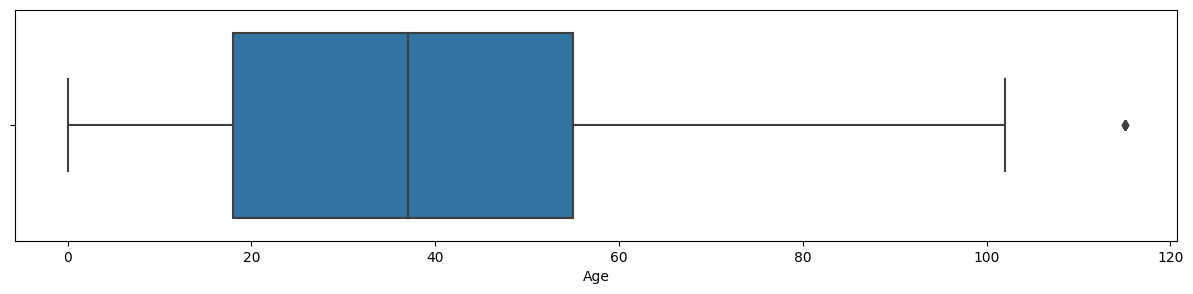

In [11]:
#plot the distribution of age in the dataset
plt.figure(figsize=(15 ,3))
sb.boxplot(x=df.Age)

The distribution graph shows that age is pretty evenly distributed with older people being on the lower end with the majority of patients lying in the age range of >20 and <60. Ages over 100 look like outliers, will be revisited later if they affect accuracy of the model

In [12]:
#investigating Age for erronous data entry
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [13]:
# sample values where Handcap is > 1
df.loc[df.Handcap.isin([2,3,4])]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
946,7.282582e+13,5582483,M,2016-04-14T09:26:08Z,2016-04-29T00:00:00Z,94.0,BELA VISTA,0,1,1,0,2,1,No
1665,1.242919e+13,5525497,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64.0,SANTA MARTHA,0,1,0,1,2,1,No
1666,1.242919e+13,5525498,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64.0,SANTA MARTHA,0,1,0,1,2,0,No
2071,1.242919e+13,5640120,M,2016-04-29T10:08:48Z,2016-04-29T00:00:00Z,64.0,SANTA MARTHA,0,1,0,1,2,0,No
2091,1.491829e+13,5638626,F,2016-04-29T08:13:59Z,2016-04-29T00:00:00Z,11.0,ANDORINHAS,0,0,0,0,2,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108376,2.387212e+14,5756931,F,2016-06-01T08:48:28Z,2016-06-07T00:00:00Z,44.0,ROMÃO,0,1,1,0,2,1,No
109484,3.589495e+14,5752442,M,2016-05-31T11:45:57Z,2016-06-02T00:00:00Z,64.0,DA PENHA,0,1,1,0,2,0,No
109733,5.662976e+14,5772744,F,2016-06-03T16:11:00Z,2016-06-07T00:00:00Z,34.0,JUCUTUQUARA,0,0,0,0,2,1,No
109975,4.522185e+13,5766970,M,2016-06-02T16:07:36Z,2016-06-06T00:00:00Z,39.0,PRAIA DO SUÁ,1,0,0,0,2,1,No


There are 199 entries where the ***Handcap*** value is outside the bounds of what is described in the data i.e. not a boolean value(0 or 1). Since values > 1 could also mean multiple values, we can standardize these values to 1 as they could represent truthy values.

In [14]:
#replace Handcap values 2,3 and 4 with 1
df.loc[df.Handcap.isin([2,3,4]),'Handcap'] = 1

In [15]:
#check if values have been successfully replaced
df.Handcap.value_counts()

0    108286
1      2241
Name: Handcap, dtype: int64

Values for Handicap have been corrected

The dataset contains columns for the date of appointment and when the appointment was scheduled, which in itself are not important attributes for classification, but a new feature using these columns can be derived, which is days patient has to wait for an appointment. We can check if more waiting leads to more No-shows, or if there exists some other correlation

Before we create a new column we need to standardize and validate the existing data

In [16]:
#standardize date format
df['ScheduledDate'] = df.ScheduledDay.apply(lambda x: pd.to_datetime(x))
df['AppointmentDate'] = df.AppointmentDay.apply(lambda x: pd.to_datetime(x))
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,AppointmentDate
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00


In [17]:
#calculate waiting period from scheduled date to appointment date
df['waiting_period'] = (df['AppointmentDate'] - df['ScheduledDate']).dt.days
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,AppointmentDate,waiting_period
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,-1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,-1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,-1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,-1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,-1


In [18]:
#check for invalid values
df['waiting_period'].value_counts()

-1      38563
 1       6725
 3       5290
 0       5213
 6       4906
        ...  
 81         1
 126        1
 125        1
 150        1
 122        1
Name: waiting_period, Length: 131, dtype: int64

The number of invalid rows i.e. waiting period = -1 is very high, from the limited amount of data sampled above it seems like the timestamp entered in the system for appointment date is erronous. We need to check if disregarding the timestamp gives better results as ~30% of the data cannot be discarded.

In [19]:
#standardize datetime formate removing time
df['ScheduledDate'] = df.ScheduledDay.apply(lambda x: pd.to_datetime(x.split("T")[0]))
df['AppointmentDate'] = df.AppointmentDay.apply(lambda x: pd.to_datetime(x.split("T")[0]))
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,AppointmentDate,waiting_period
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,-1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,-1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,-1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29,-1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29,-1


In [20]:
#calculate waiting period from scheduled date to appointment date
df['waiting_period'] = (df['AppointmentDate'] - df['ScheduledDate']).dt.days
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,AppointmentDate,waiting_period
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29,0


In [21]:
#check if there are still invalid dates
df.loc[df.waiting_period < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,AppointmentDate,waiting_period
27033,7.839273e+12,5679978,M,2016-05-10T10:51:53Z,2016-05-09T00:00:00Z,38.0,RESISTÊNCIA,0,0,0,0,1,0,Yes,2016-05-10,2016-05-09,-1
55226,7.896294e+12,5715660,F,2016-05-18T14:50:41Z,2016-05-17T00:00:00Z,19.0,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,2016-05-18,2016-05-17,-1
64175,2.425226e+13,5664962,F,2016-05-05T13:43:58Z,2016-05-04T00:00:00Z,22.0,CONSOLAÇÃO,0,0,0,0,0,0,Yes,2016-05-05,2016-05-04,-1
71533,9.982316e+14,5686628,F,2016-05-11T13:49:20Z,2016-05-05T00:00:00Z,81.0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,2016-05-11,2016-05-05,-6
72362,3.787482e+12,5655637,M,2016-05-04T06:50:57Z,2016-05-03T00:00:00Z,7.0,TABUAZEIRO,0,0,0,0,0,0,Yes,2016-05-04,2016-05-03,-1


After discarding timestamp, there are 5 rows where Appointment Date is before Scheduled Date - these will be discarded

In [23]:
#filter out entries with invalid dates
df.drop(df[df.waiting_period < 0].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110522 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   PatientId        110522 non-null  float64       
 1   AppointmentID    110522 non-null  int64         
 2   Gender           110522 non-null  object        
 3   ScheduledDay     110522 non-null  object        
 4   AppointmentDay   110522 non-null  object        
 5   Age              110522 non-null  float64       
 6   Neighbourhood    110522 non-null  object        
 7   Scholarship      110522 non-null  int64         
 8   Hipertension     110522 non-null  int64         
 9   Diabetes         110522 non-null  int64         
 10  Alcoholism       110522 non-null  int64         
 11  Handcap          110522 non-null  int64         
 12  SMS_received     110522 non-null  int64         
 13  No-show          110522 non-null  object        
 14  ScheduledDate    110

In [25]:
#check if only valid entries exist
df.loc[df.waiting_period < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDate,AppointmentDate,waiting_period


In [26]:
df = df.reset_index(drop=True)

No invalid rows where appointment date < scheduled date exist in the dataset

We can check the gender split in the data and if it affects the % of No-shows. Based on just value counts, the dataset contains **64% female and 36% male patients**

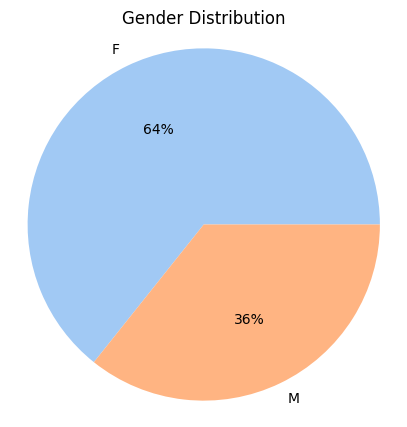

In [39]:
#get unique no. of patients by Gender
gender_counts = df.groupby('Gender')['PatientId'].nunique()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, colors=sb.color_palette("pastel"), autopct='%.0f%%')
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [40]:
#get no. of No-shows for females
df.loc[df.Gender =='F']['No-show'].value_counts()

No     57246
Yes    14591
Name: No-show, dtype: int64

Out of the 71,837 female patient records, 14,591 appointments are no-shows i.e. **~20.31%**.

In [41]:
#get no. of No-shows for males
df.loc[df.Gender =='M']['No-show'].value_counts()

No     30962
Yes     7723
Name: No-show, dtype: int64

Out of the 38,685 male patient records, 7,723 appointments are no-shows i.e. **~19.96%**.

#### Hence the % of no shows across gender is relatively the same.

<Axes: xlabel='Gender', ylabel='percent'>

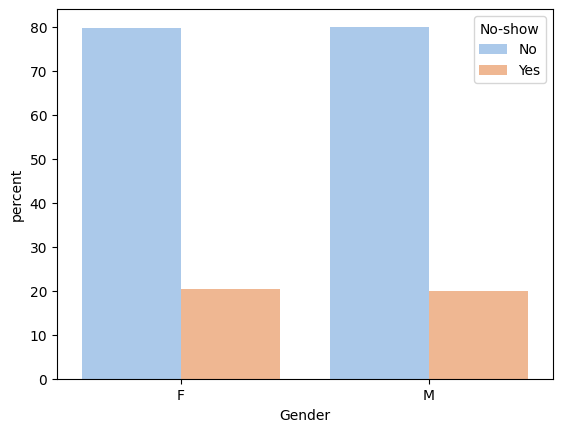

In [42]:
x,y = 'Gender', 'No-show'

#calculate % of No-show by Gender and plot them ona bar graph
(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sb.barplot,'data'), x=x,y='percent',hue=y, palette=sb.color_palette("pastel")))

Representing the same information visually just confirms the above numbers

Plotting no-shows by neighbourhoods doesn't provide any useful insight as there is no way to directly co-relate the neighbourhood by distance or any other metric to the hospital which would contribute to a higher or lower rate of no-shows.

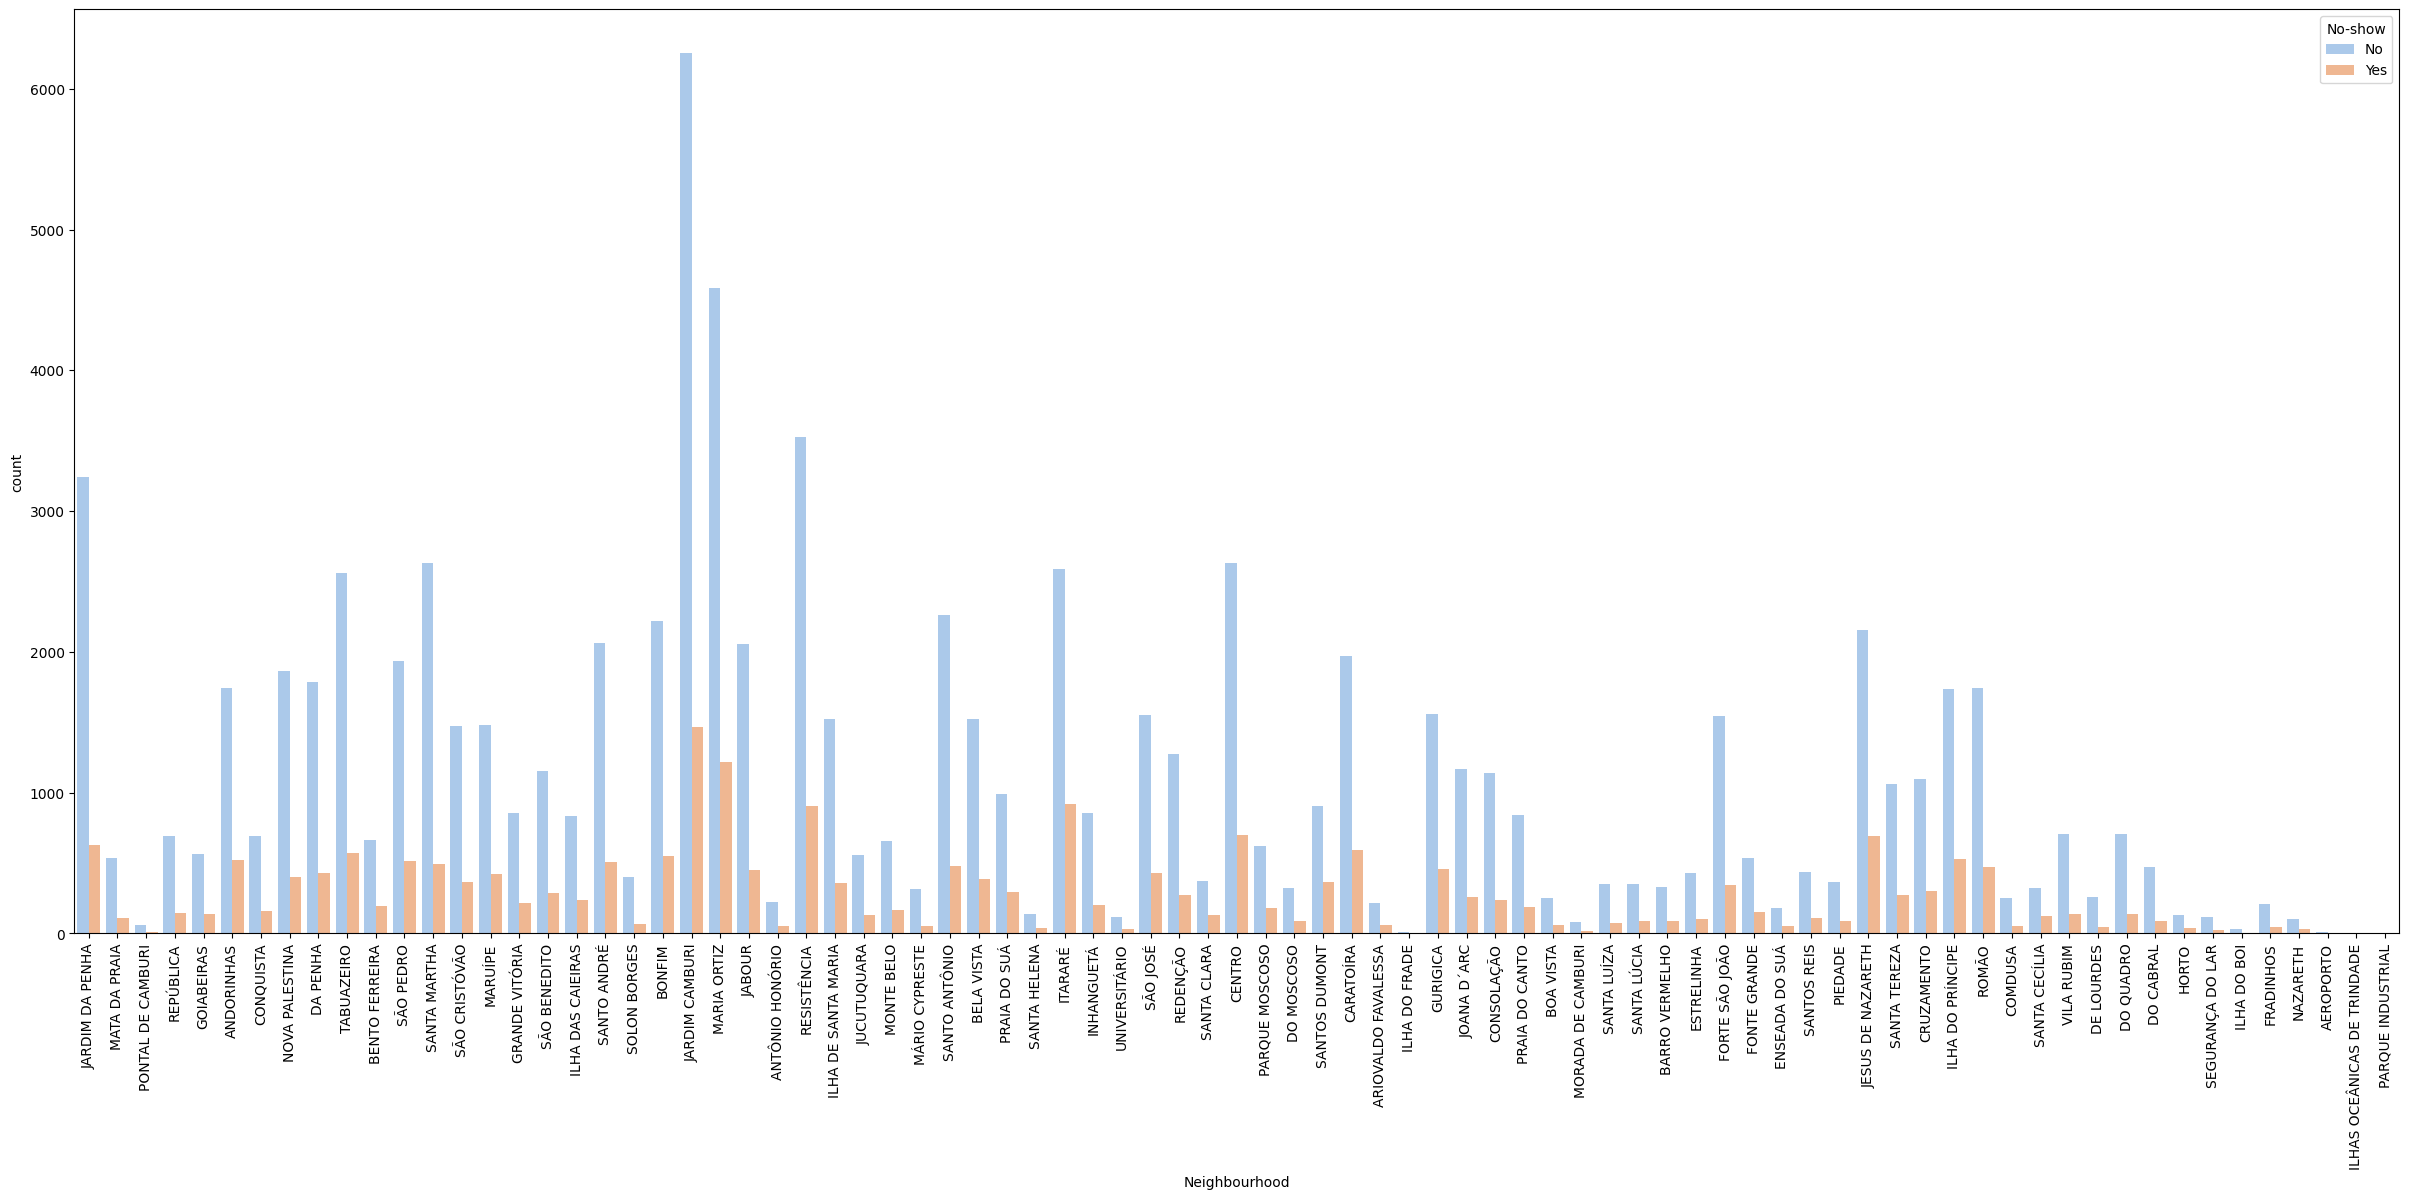

In [43]:
#plot no of no-shows against neighbourhoods
plt.figure(figsize=(30,12))
fig = sb.countplot(x='Neighbourhood',hue='No-show',data=df, palette=sb.color_palette("pastel"))
fig.set_xticklabels(fig.get_xticklabels(), rotation=90);

Schloarship which represents if a patient is covered under the Bolsa Familia welfare scheme can also be checked to see if it has an effect of the % of no-shows.

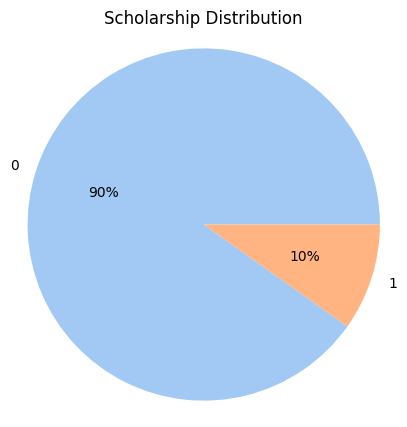

In [44]:
#get no. of appointments covered under the scheme
sch_counts = df.Scholarship.value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(sch_counts, labels=sch_counts.index, colors=sb.color_palette("pastel"), autopct='%.0f%%')
plt.title('Scholarship Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Based on the above only **10%** of the total appointments were covered under the scheme. Here the no. of unique patients was not considered as in gender, as one patient could be covered and not covered for different instances of time in the dataset

<Axes: xlabel='Scholarship', ylabel='percent'>

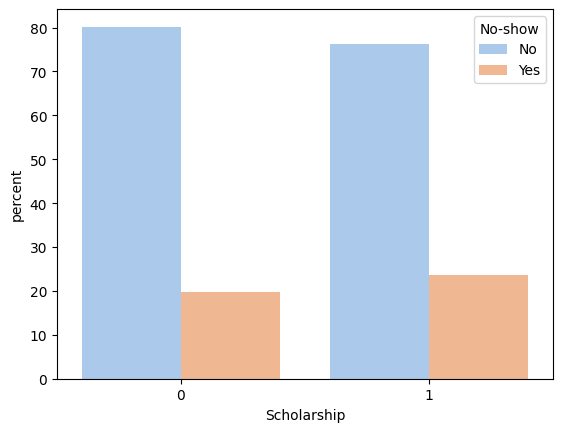

In [45]:
x,y = 'Scholarship', 'No-show'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sb.barplot,'data'), x=x,y='percent',hue=y, palette=sb.color_palette("pastel")))

Similarly, rates of no-shows for scholarship has almost no difference with the rate skewing slighlty higher for patients with scholarship

We can also look at the diseases to see if they have any effect on the % of No-shows regardless of any other attribute like age or gender. Just based on the disease distrbution among patients during their appointments only **7% were positive for diabetes**, **3% were alcoholics** and **2% were handicapped**. The most prevalent condition in patients was **hypertension at 20%**

(-1.099999929957982,
 1.0999999966646659,
 -1.0999998262918227,
 1.099999980156276)

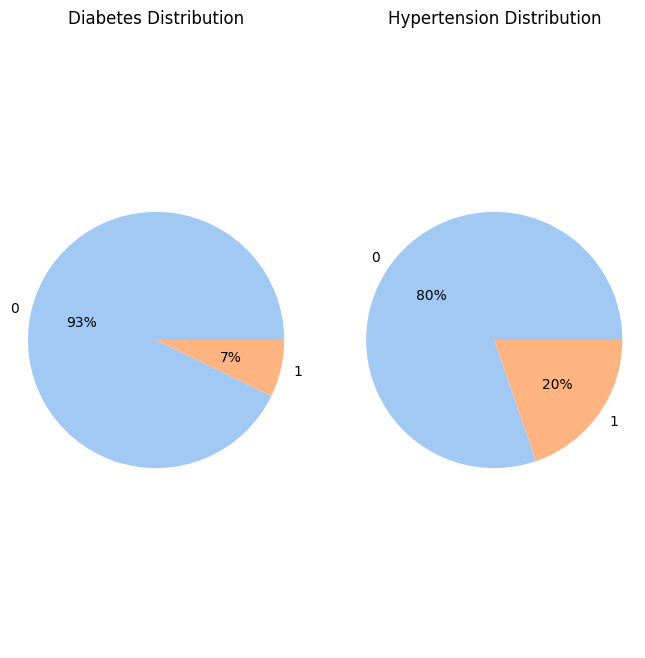

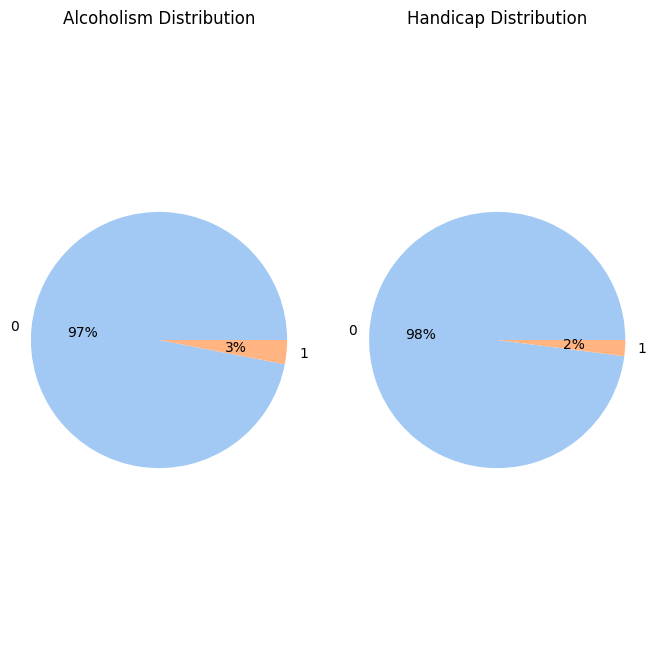

In [46]:
#get no. of appointments covered under the scheme
diab_counts = df.Diabetes.value_counts()
hiper_counts = df.Hipertension.value_counts()
alc_counts = df.Alcoholism.value_counts()
handcap_counts = df.Handcap.value_counts()

fig, (pd,ph) = plt.subplots(1,2,figsize=(8,8)) #pd, ph refer to your two pies

# Create a pie chart
pd.pie(diab_counts, labels=diab_counts.index, colors=sb.color_palette("pastel"), autopct='%.0f%%')
pd.set_title('Diabetes Distribution')
pd.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create a pie chart
ph.pie(hiper_counts, labels=hiper_counts.index, colors=sb.color_palette("pastel"), autopct='%.0f%%')
ph.set_title('Hypertension Distribution')
ph.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


fig, (pa,pha) = plt.subplots(1,2,figsize=(8,8)) #pa, pha refer to your two pies

# Create a pie chart
pa.pie(alc_counts, labels=alc_counts.index, colors=sb.color_palette("pastel"), autopct='%.0f%%')
pa.set_title('Alcoholism Distribution')
pa.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create a pie chart
pha.pie(handcap_counts, labels=handcap_counts.index, colors=sb.color_palette("pastel"), autopct='%.0f%%')
pha.set_title('Handicap Distribution')
pha.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


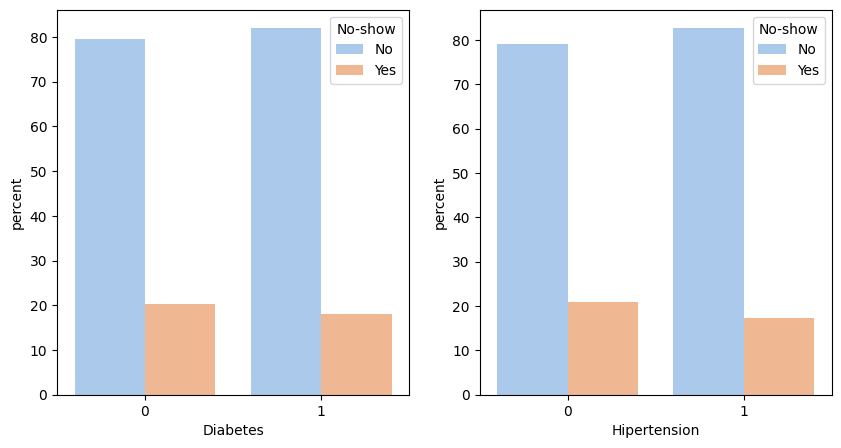

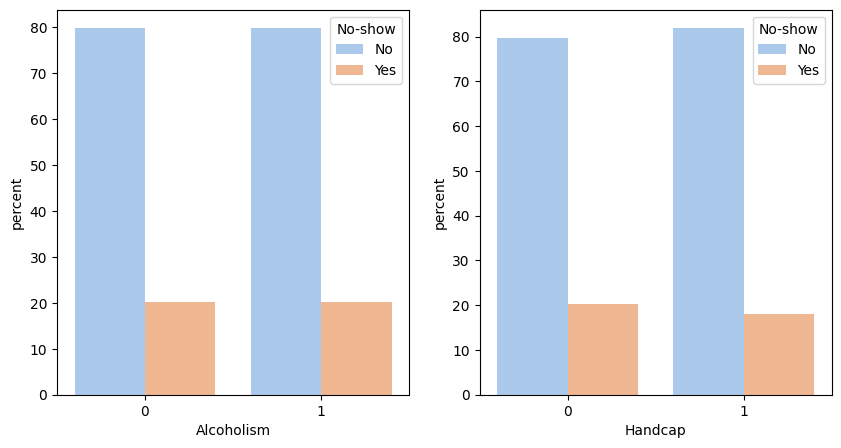

In [47]:
def plot_percent(feature, graph_reference):
    x,y = feature, 'No-show'

    (df
    .groupby(x)[y]
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
    .pipe((sb.barplot,'data'), x=x,y='percent', hue=y, palette=sb.color_palette("pastel"), ax=graph_reference))


fig, (pd,ph) = plt.subplots(1,2,figsize=(10,5)) #pd,ph refer to your two pies
plot_percent('Diabetes', pd)
plot_percent('Hipertension', ph)


fig, (pa,pha) = plt.subplots(1,2,figsize=(10,5)) #pa,pha refer to your two pies
plot_percent('Alcoholism', pa)
plot_percent('Handcap', pha)

As clearly seen in the graphs, having a handicap or other conditions doesn't affect the no-show rate, people with at least are almost just as likely to miss an appointment as people without a condition

Another distribution to be checked is the SMS_Recieved field, which potentially indicates if the patient was reminded of the appointment via SMS

<Axes: xlabel='SMS_received', ylabel='percent'>

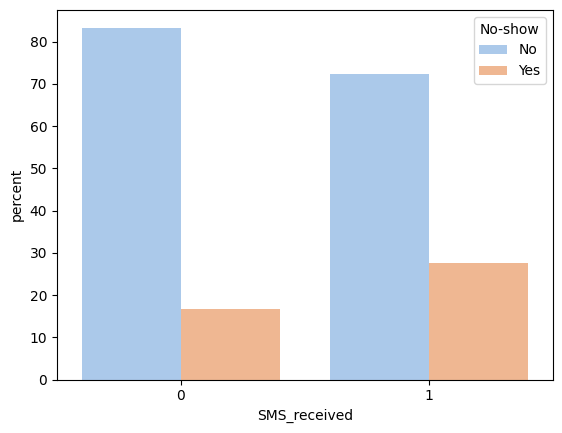

In [48]:
x,y = 'SMS_received', 'No-show'

(df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sb.barplot,'data'), x=x,y='percent',hue=y, palette=sb.color_palette("pastel")))

Based on the data we can see that patients that were contacted by SMS were more likely to not show up for their appointments i.e. suggesting a negative coorelation

## **Modelling**

Before we build our models, we need to check feature importance and standardize our data.


We need to check what does the correlation between all available features
For the same we need all numeric values, hence converting ***No-show*** to numberic values (No to 0 and Yes to 1)

In [49]:
# converting No-show to 0 and 1
corr_data = df
corr_data['No-show']= df['No-show'].replace('No', 0)
corr_data['No-show']= df['No-show'].replace('Yes', 1)
corr_data['No-show'].value_counts()

0    88208
1    22314
Name: No-show, dtype: int64

In [50]:
#rearrange columns to keep dependent varaible i.e. No-show at the end
list(corr_data.columns.values)
corr_data = corr_data[['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDate',
 'AppointmentDate',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'waiting_period',
 'No-show',
]]

In [51]:
#calculate correlation matrix
corr_matrix = corr_data.corr()
corr_matrix['No-show']

<ipython-input-51-c5321f404302>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = corr_data.corr()


PatientId        -0.001483
AppointmentID    -0.162624
Age              -0.060320
Scholarship       0.029167
Hipertension     -0.035660
Diabetes         -0.015156
Alcoholism       -0.000180
Handcap          -0.007527
SMS_received      0.126505
waiting_period    0.186322
No-show           1.000000
Name: No-show, dtype: float64

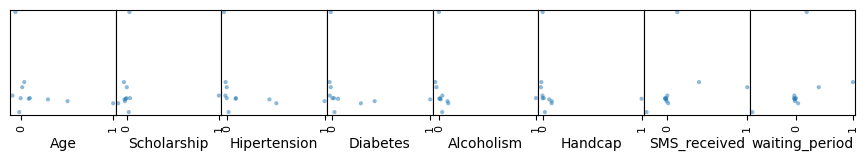

In [52]:
#plot scatter matrix for correlation matrix
from pandas.plotting import scatter_matrix
axes = scatter_matrix(corr_matrix, figsize=(15, 15))

#set visibility of all elements except No-show to False
for i in range(np.shape(axes)[0] - 1):
    for j in range(np.shape(axes)[1]):
        axes[i,j].set_visible(False)

#disregard patientId and appointmentID and no-show itself
axes[10,0].set_visible(False)
axes[10,1].set_visible(False)
axes[10,10].set_visible(False)

<Axes: >

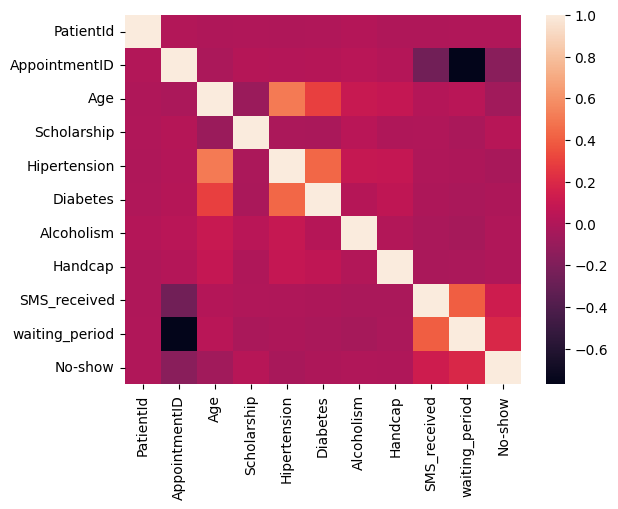

In [53]:
import seaborn as sb
sb.heatmap(corr_matrix)

Based on the above visualizations, heatmap is much better at providing the simplicity and clarity required to read the complex correlation matrix.

Focusing on our dependent variable i.e. No-show, we can see that patientID and appointmentID can be disregarded as they are system generated numbers and do not have any correlation with the target variable.

Further, all attributes except SMS_received and waiting_period have little to no correlation with No-show.

In [54]:
#only select relevant columns in final feature set
final_data = df[[
 'Gender',
 'Age',
 'Neighbourhood',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'waiting_period',
 'No-show',
]]

final_data.head(25)

,Gender,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,waiting_period,No-show
0,F,62.0,JARDIM DA PENHA,1,0,0,0,0,0,0
1,M,56.0,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,62.0,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,56.0,JARDIM DA PENHA,1,1,0,0,0,0,0
5,F,76.0,REPÚBLICA,1,0,0,0,0,2,0
6,F,23.0,GOIABEIRAS,0,0,0,0,0,2,1
7,F,39.0,GOIABEIRAS,0,0,0,0,0,2,1
8,F,21.0,ANDORINHAS,0,0,0,0,0,0,0
9,F,19.0,CONQUISTA,0,0,0,0,0,2,0


In [84]:
from sklearn.preprocessing import OrdinalEncoder

y = final_data["No-show"]
X = final_data[['Gender',
 'Age',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'waiting_period']]

ordinal_encoder =  OrdinalEncoder(handle_unknown='error')
ordinal_encoder.fit(X)
X = ordinal_encoder.fit_transform(X)

## **Results**



 Fold:  0
Train Index:  [ 11053  11054  11055 ... 110519 110520 110521]
Test Index:  [    0     1     2 ... 11050 11051 11052]

Decision Tree
Accuracy Score:  0.794987786121415
F1 Score:  0.018197573656845756
Recall Score:  0.009391771019677997
Precision Score:  0.2916666666666667
AUC:  0.5018037453261031

Random Forest
Accuracy Score:  0.7976115081878223
F1 Score:  0.0017849174475680501
Recall Score:  0.0008944543828264759
Precision Score:  0.4
AUC:  0.5002771012982522

Logistic Regression
Accuracy Score:  0.7950782592961188
F1 Score:  0.0199048031155344
Recall Score:  0.010286225402504472
Precision Score:  0.30666666666666664
AUC:  0.5021942638864626


 Fold:  1
Train Index:  [     0      1      2 ... 110519 110520 110521]
Test Index:  [11053 11054 11055 ... 22103 22104 22105]

Decision Tree
Accuracy Score:  0.7996923912060074
F1 Score:  0.023809523809523808
Recall Score:  0.012430939226519336
Precision Score:  0.28125
AUC:  0.5023307719440783

Random Forest
Accuracy Score:  0.8034

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_plot/roc_curve.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


Accuracy Score:  0.8099891422366993
F1 Score:  0.07651715039577836
Recall Score:  0.04452405322415558
Precision Score:  0.271875
AUC:  0.5094570145215085


 Fold:  7
Train Index:  [     0      1      2 ... 110519 110520 110521]
Test Index:  [77366 77367 77368 ... 88415 88416 88417]

Decision Tree
Accuracy Score:  0.8079080709373869
F1 Score:  0.0466995958688819
Recall Score:  0.024516737388024516
Precision Score:  0.49056603773584906
AUC:  0.5092351909983456

Random Forest
Accuracy Score:  0.8079985522982266
F1 Score:  0.0018814675446848542
Recall Score:  0.000942951438000943
Precision Score:  0.4
AUC:  0.5003035214025746

Logistic Regression
Accuracy Score:  0.8045602605863192
F1 Score:  0.0417036379769299
Recall Score:  0.02215935879302216
Precision Score:  0.3533834586466165
AUC:  0.506264988992301


 Fold:  8
Train Index:  [     0      1      2 ... 110519 110520 110521]
Test Index:  [88418 88419 88420 ... 99467 99468 99469]

Decision Tree
Accuracy Score:  0.8242851972493667
F1 Scor

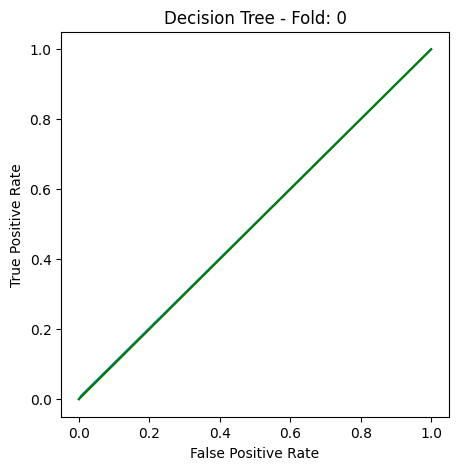

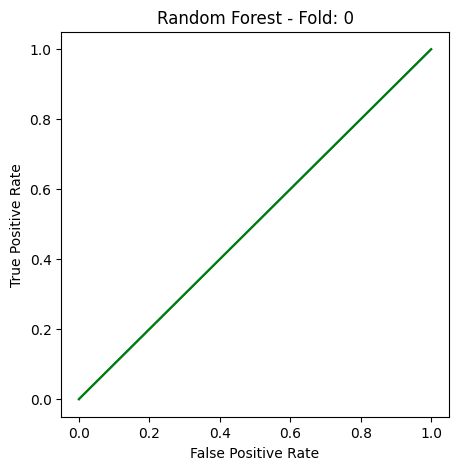

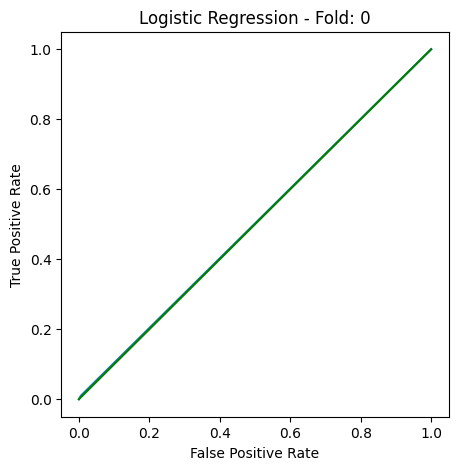

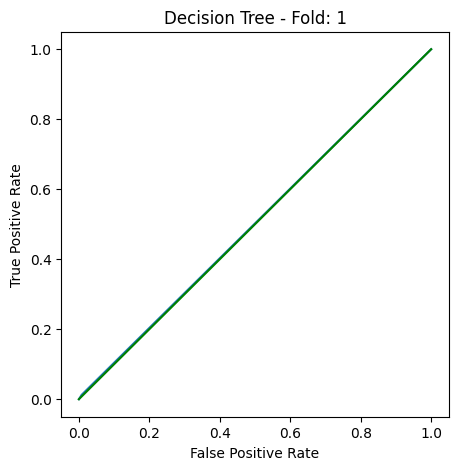

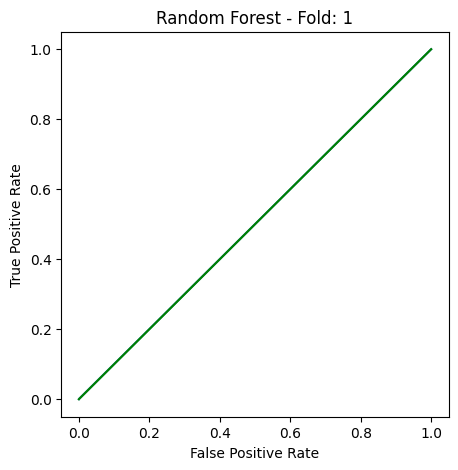

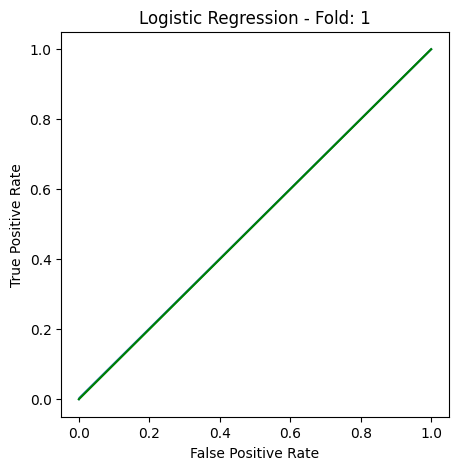

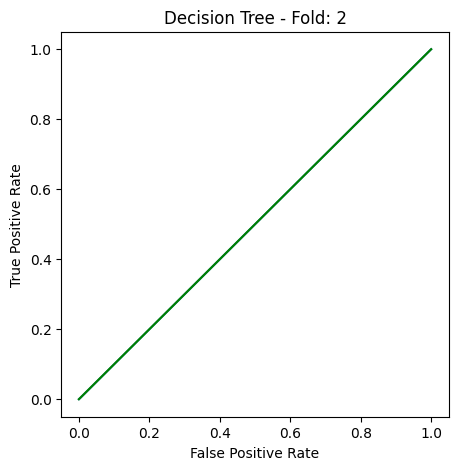

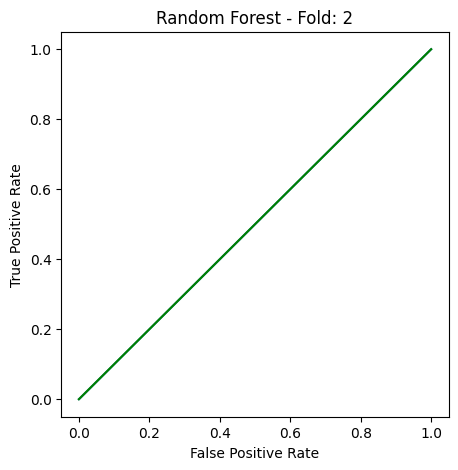

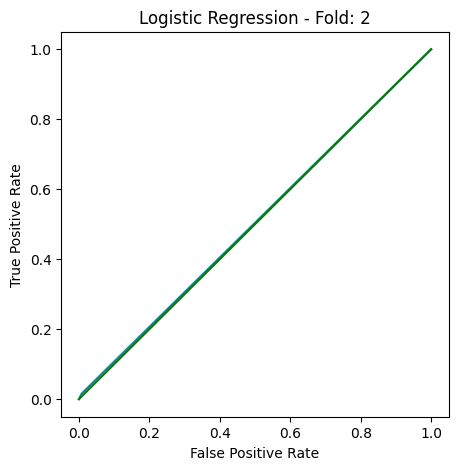

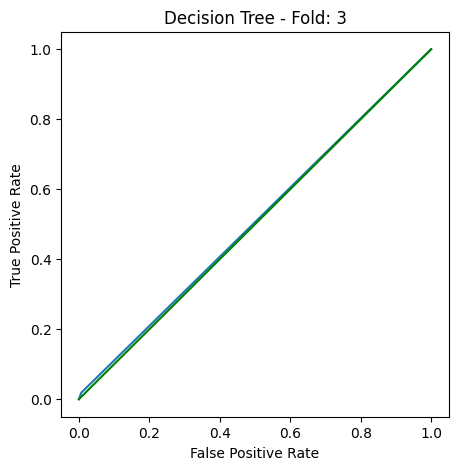

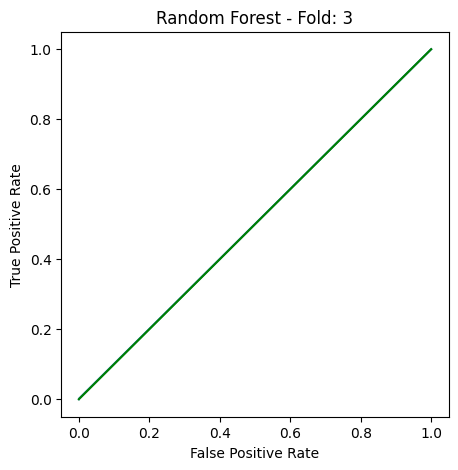

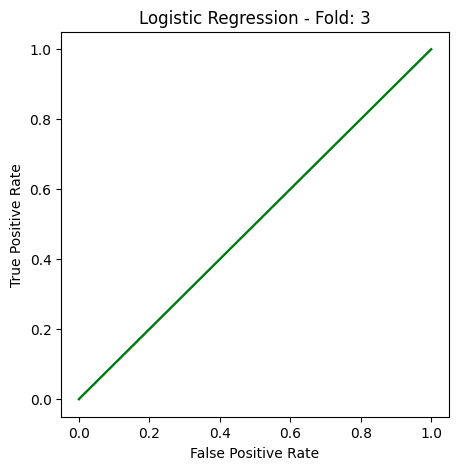

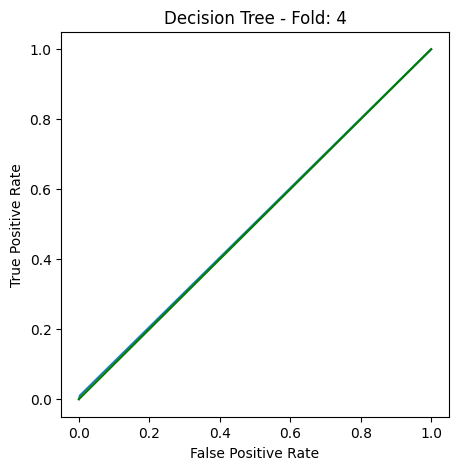

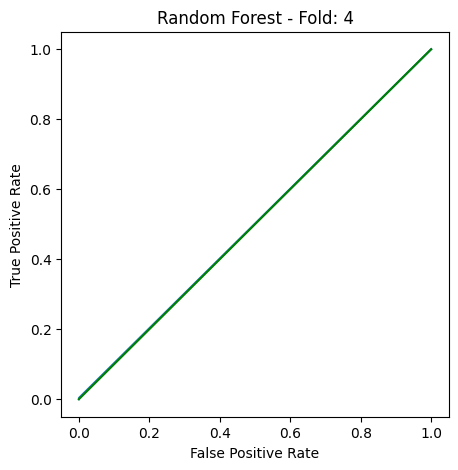

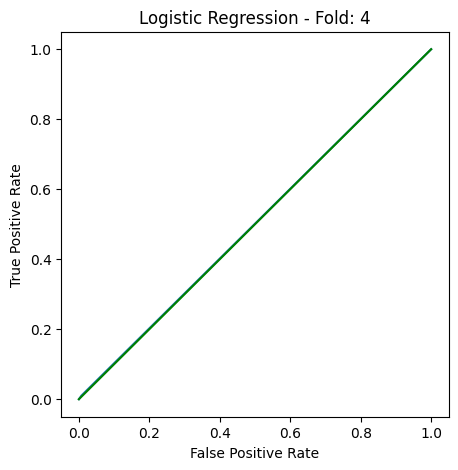

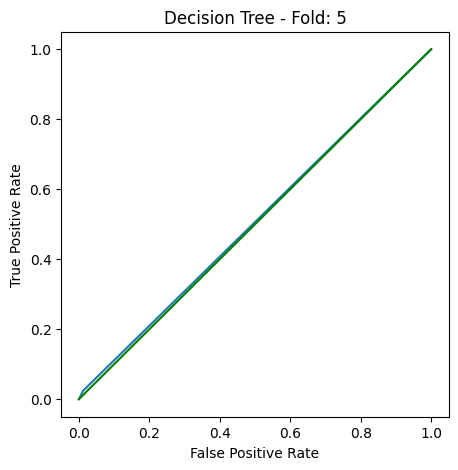

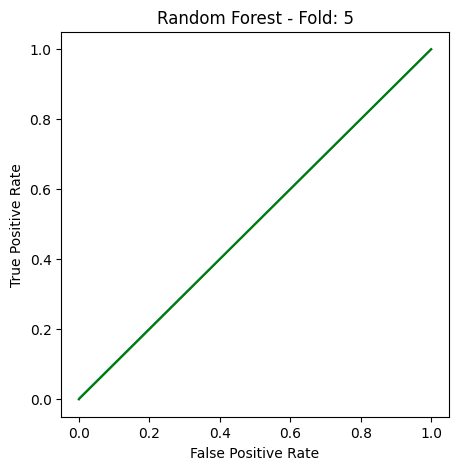

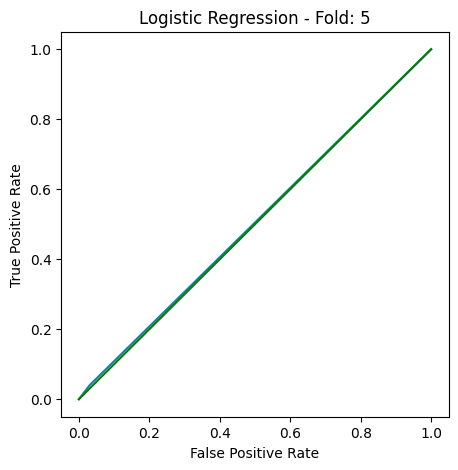

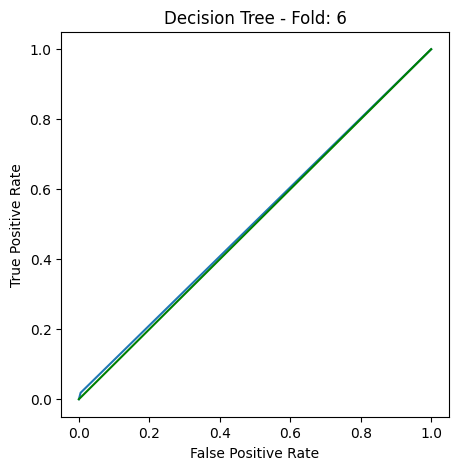

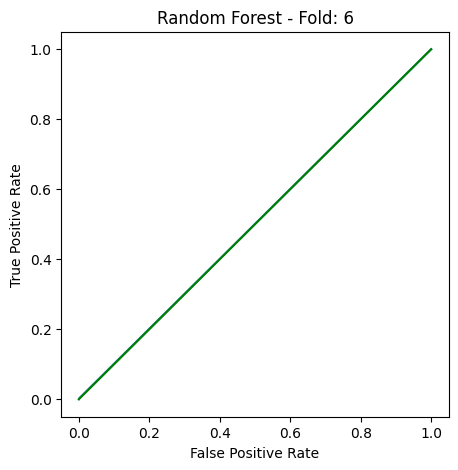

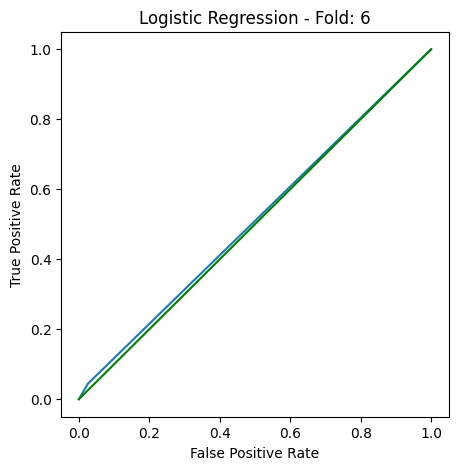

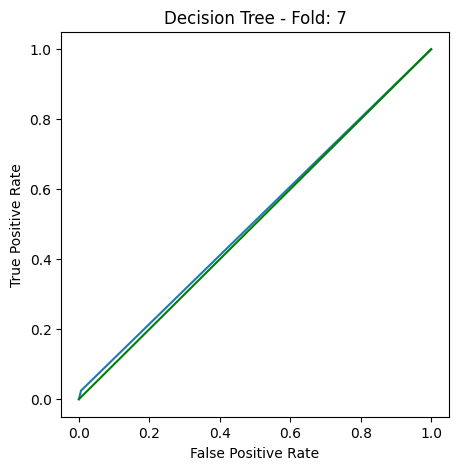

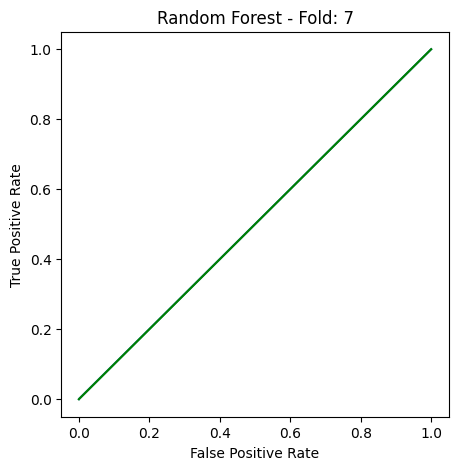

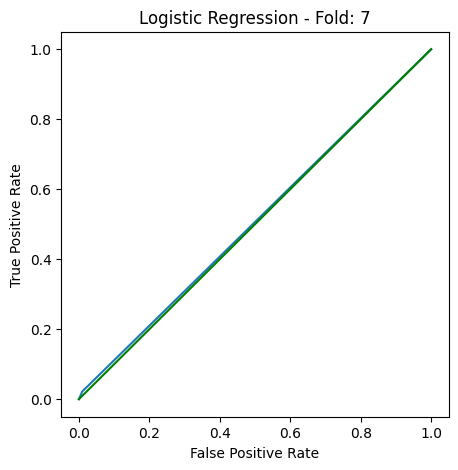

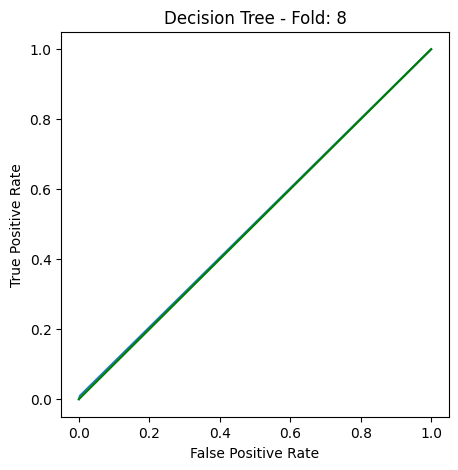

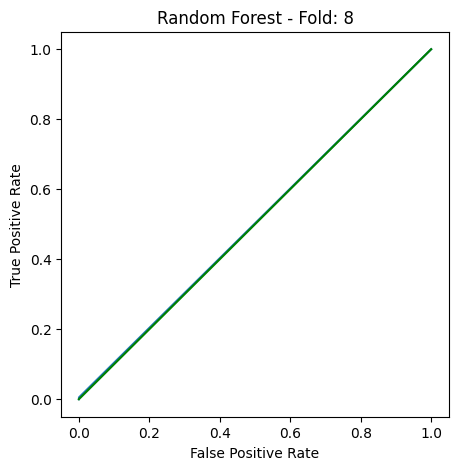

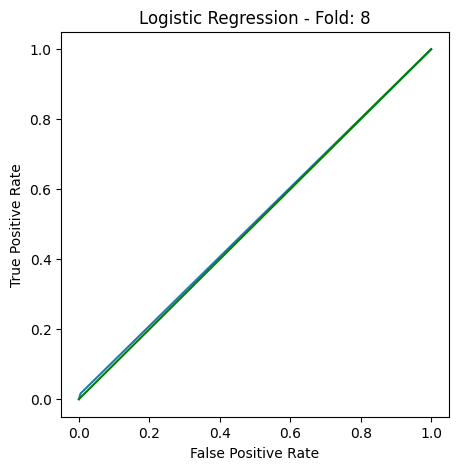

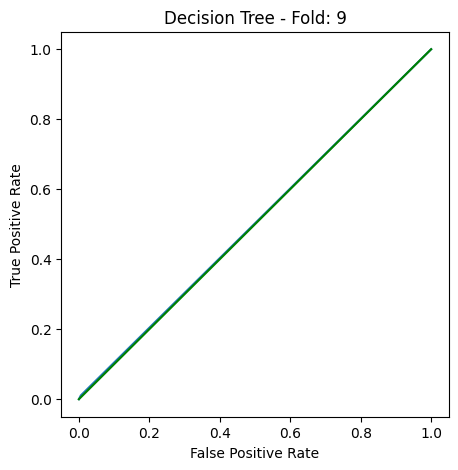

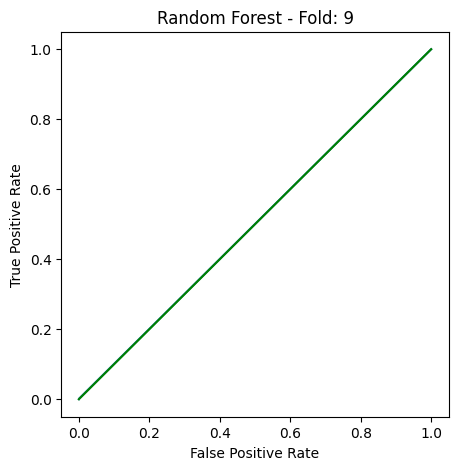

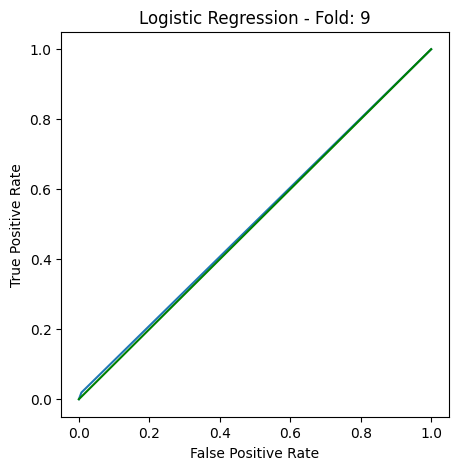

In [106]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, auc, roc_curve, RocCurveDisplay
from sklearn.model_selection import KFold
import pandas as pnd

# initialize all models with necessary hyperparams
decision_tree = tree.DecisionTreeClassifier(max_depth = 9, min_samples_split=3)
random_forest = RandomForestClassifier(n_estimators=700, max_depth=9, min_samples_split=3, random_state=1)
logistic_regressor = LogisticRegression(max_iter=2000)

#generate k=10 splits of the data
kf = KFold(n_splits=10)
kf.get_n_splits(X)


def plot_roc_curve(fpr, tpr, model, fold):
  roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
  roc_display.figure_.set_size_inches(5,5)
  plt.plot([0, 1], [0, 1], color = 'g')
  plt.title(model + " - Fold: " + str(fold))

#create dataframe to store all results
results = pnd.DataFrame(columns=['fold', 'model', 'accuracy', 'f1_score', 'recall', 'precision', 'auc','tpr', 'fpr'])
r = 0

for i, (train_index,test_index) in enumerate(kf.split(X)):
    print("\n\n Fold: ", i)
    print("Train Index: ", train_index,)
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

    print("\nDecision Tree")
    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    prec = precision_score(y_test, y_pred, zero_division=1)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_score=auc(fpr, tpr)
    plot_roc_curve(fpr,tpr, "Decision Tree", i)
    print('Accuracy Score: ', acc)
    print('F1 Score: ', f1)
    print('Recall Score: ', recall)
    print('Precision Score: ', prec)
    print('AUC: ', auc_score)
    results.loc[r] = [i, 'DT', acc, f1, recall, prec, auc_score, tpr, fpr]
    r=r+1


    print("\nRandom Forest")
    random_forest.fit(X_train, y_train)
    y_pred_rf = random_forest.predict(X_test)
    acc = accuracy_score(y_test, y_pred_rf)
    f1 = f1_score(y_test, y_pred_rf, zero_division=1)
    recall = recall_score(y_test, y_pred_rf, zero_division=1)
    prec = precision_score(y_test, y_pred_rf, zero_division=1)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
    auc_score=auc(fpr, tpr)
    plot_roc_curve(fpr,tpr, "Random Forest", i)
    print('Accuracy Score: ', acc)
    print('F1 Score: ', f1)
    print('Recall Score: ', recall)
    print('Precision Score: ', prec)
    print('AUC: ', auc_score)
    results.loc[r] = [i, 'RF', acc, f1, recall, prec, auc_score, tpr, fpr]
    r=r+1

    print("\nLogistic Regression")
    logistic_regressor.fit(X_train,y_train)
    y_pred_lr = logistic_regressor.predict(X_test)
    acc = accuracy_score(y_test, y_pred_lr)
    f1 = f1_score(y_test, y_pred_lr, zero_division=1)
    recall = recall_score(y_test, y_pred_lr, zero_division=1)
    prec = precision_score(y_test, y_pred_lr, zero_division=1)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
    auc_score=auc(fpr, tpr)
    plot_roc_curve(fpr,tpr, "Logistic Regression", i)
    print('Accuracy Score: ', acc)
    print('F1 Score: ', f1)
    print('Recall Score: ', recall)
    print('Precision Score: ', prec)
    print('AUC: ', auc_score)
    results.loc[r] = [i, 'LR', acc, f1, recall, prec, auc_score, tpr, fpr]
    r=r+1

In [112]:
dt_data = results.loc[results.model == "DT"]
lr_data = results.loc[results.model == "LR"]
rf_data = results.loc[results.model == "RF"]

def plot_metrics(dataframe, model):
  # Create the plot
  plt.figure(figsize=(10, 6))
  plt.plot(dataframe.fold, dataframe.accuracy, label='Accuracy', marker='o')
  plt.plot(dataframe.fold, dataframe.f1_score, label='F1 Score', marker='o')
  plt.plot(dataframe.fold, dataframe.recall, label='Recall', marker='o')
  plt.plot(dataframe.fold, dataframe.precision, label='Precision', marker='o')

  # Customize the plot
  plt.title(model + 'Performance Metrics Across folds')
  plt.xlabel('fold')
  plt.ylabel('Score')
  plt.xticks(dataframe.fold)
  plt.legend()
  plt.grid(True)

  # Show the plot
  plt.show()

In [113]:
dt_data.head(10)

,fold,model,accuracy,f1_score,recall,precision,auc,tpr,fpr
0,0,DT,0.794988,0.018198,0.009392,0.291667,0.501804,"[0.0, 0.009391771019677997, 1.0]","[0.0, 0.005784280367471929, 1.0]"
3,1,DT,0.799692,0.023810,0.012431,0.281250,0.502331,"[0.0, 0.012430939226519336, 1.0]","[0.0, 0.007769395338362797, 1.0]"
6,2,DT,0.774430,0.007168,0.003647,0.209302,0.499843,"[0.0, 0.003646677471636953, 1.0]","[0.0, 0.0039608574091332715, 1.0]"
9,3,DT,0.792798,0.035383,0.018470,0.420000,0.505931,"[0.0, 0.018469656992084433, 1.0]","[0.0, 0.006607427660059239, 1.0]"
12,4,DT,0.773887,0.020384,0.010396,0.520000,0.503795,"[0.0, 0.010395841663334666, 1.0]","[0.0, 0.0028066892761080577, 1.0]"
15,5,DT,0.778592,0.045259,0.024136,0.362500,0.506172,"[0.0, 0.024136496046608405, 1.0]","[0.0, 0.011793270898369753, 1.0]"
18,6,DT,0.822476,0.035398,0.018424,0.450000,0.506794,"[0.0, 0.01842374616171955, 1.0]","[0.0, 0.0048362277423609585, 1.0]"
21,7,DT,0.807908,0.046700,0.024517,0.490566,0.509235,"[0.0, 0.024516737388024516, 1.0]","[0.0, 0.006046355391333557, 1.0]"
24,8,DT,0.824285,0.019192,0.009824,0.413043,0.503432,"[0.0, 0.00982419855222337, 1.0]","[0.0, 0.0029611756964246544, 1.0]"
27,9,DT,0.794245,0.020672,0.010662,0.338028,0.502661,"[0.0, 0.010661928031985785, 1.0]","[0.0, 0.005340302238382002, 1.0]"


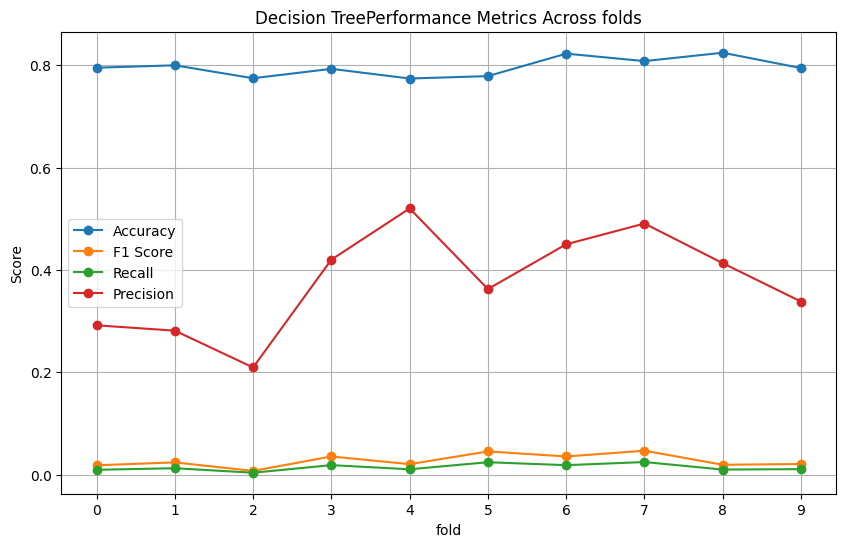

In [114]:
plot_metrics(dt_data, 'Decision Tree')

In [115]:
rf_data.head(10)

,fold,model,accuracy,f1_score,recall,precision,auc,tpr,fpr
1,0,RF,0.797612,0.001785,0.000894,0.400000,0.500277,"[0.0, 0.0008944543828264759, 1.0]","[0.0, 0.0003402517863218782, 1.0]"
4,1,RF,0.803402,0.001837,0.000921,0.400000,0.500292,"[0.0, 0.0009208103130755065, 1.0]","[0.0, 0.0003377997973201216, 1.0]"
7,2,RF,0.776059,0.001614,0.000810,0.181818,0.499881,"[0.0, 0.0008103727714748784, 1.0]","[0.0, 0.001048462255358807, 1.0]"
10,3,RF,0.794426,0.002634,0.001319,0.750000,0.500603,"[0.0, 0.0013192612137203166, 1.0]","[0.0, 0.0001139211665527455, 1.0]"
13,4,RF,0.774339,0.007166,0.003599,0.818182,0.501682,"[0.0, 0.003598560575769692, 1.0]","[0.0, 0.0002338907730090048, 1.0]"
16,5,RF,0.782573,0.004144,0.002081,0.500000,0.500751,"[0.0, 0.0020807324178110697, 1.0]","[0.0, 0.0005781015146259683, 1.0]"
19,6,RF,0.823290,0.004080,0.002047,0.571429,0.500859,"[0.0, 0.0020470829068577278, 1.0]","[0.0, 0.0003297428006155199, 1.0]"
22,7,RF,0.807999,0.001881,0.000943,0.400000,0.500304,"[0.0, 0.000942951438000943, 1.0]","[0.0, 0.0003359086328518643, 1.0]"
25,8,RF,0.825642,0.010272,0.005171,0.769231,0.502421,"[0.0, 0.005170630816959669, 1.0]","[0.0, 0.0003290195218249616, 1.0]"
28,9,RF,0.796236,0.003540,0.001777,0.444444,0.500604,"[0.0, 0.001776988005330964, 1.0]","[0.0, 0.0005681172594023407, 1.0]"


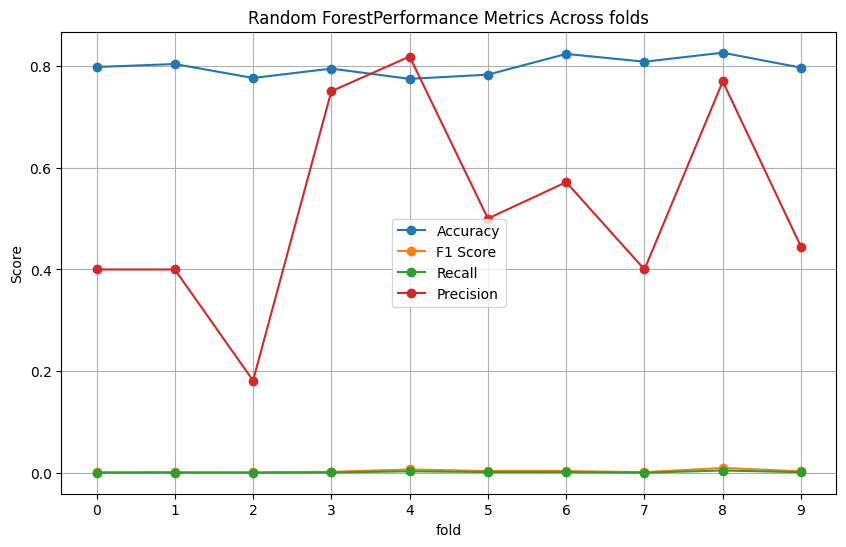

In [116]:
plot_metrics(rf_data, 'Random Forest')

In [117]:
lr_data.head(10)

,fold,model,accuracy,f1_score,recall,precision,auc,tpr,fpr
2,0,LR,0.795078,0.019905,0.010286,0.306667,0.502194,"[0.0, 0.010286225402504472, 1.0]","[0.0, 0.005897697629579222, 1.0]"
5,1,LR,0.803040,0.007296,0.003683,0.380952,0.501110,"[0.0, 0.003683241252302026, 1.0]","[0.0, 0.0014637991217205269, 1.0]"
8,2,LR,0.774339,0.030327,0.015802,0.375000,0.504115,"[0.0, 0.015802269043760128, 1.0]","[0.0, 0.007572227399813607, 1.0]"
11,3,LR,0.794245,0.001756,0.000880,0.500000,0.500326,"[0.0, 0.0008795074758135445, 1.0]","[0.0, 0.000227842333105491, 1.0]"
14,4,LR,0.770630,0.019342,0.009996,0.297619,0.501548,"[0.0, 0.009996001599360257, 1.0]","[0.0, 0.006899777803765641, 1.0]"
17,5,LR,0.767463,0.069515,0.039950,0.267409,0.504771,"[0.0, 0.039950062421972535, 1.0]","[0.0, 0.030408139669325932, 1.0]"
20,6,LR,0.809989,0.076517,0.044524,0.271875,0.509457,"[0.0, 0.04452405322415558, 1.0]","[0.0, 0.02561002418113871, 1.0]"
23,7,LR,0.804560,0.041704,0.022159,0.353383,0.506265,"[0.0, 0.02215935879302216, 1.0]","[0.0, 0.00962938080842011, 1.0]"
26,8,LR,0.824104,0.030907,0.016029,0.430556,0.505766,"[0.0, 0.016028955532574975, 1.0]","[0.0, 0.004496600131607809, 1.0]"
29,9,LR,0.794517,0.036487,0.019103,0.405660,0.505972,"[0.0, 0.019102621057307864, 1.0]","[0.0, 0.007158277468469492, 1.0]"


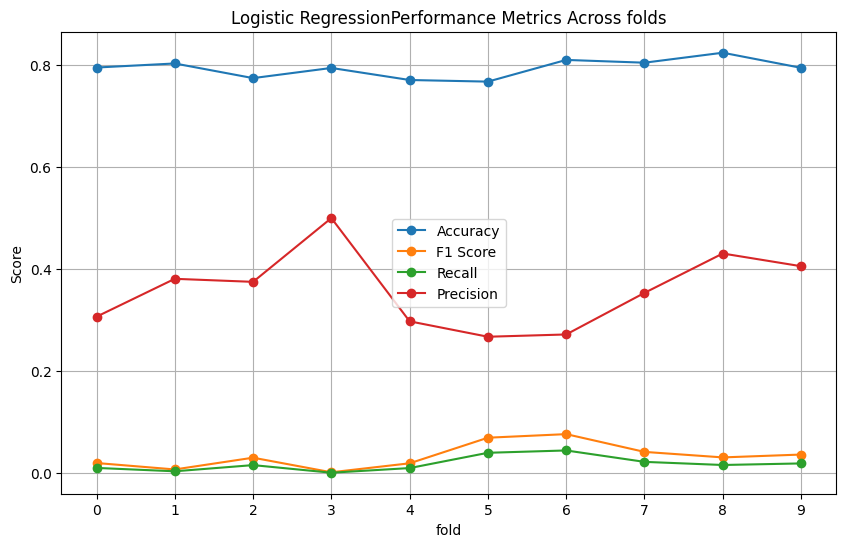

In [118]:
plot_metrics(lr_data, 'Logistic Regression')

## **Results Analysis**

Here's a summary of the results for each model:

***Note***: Hyperparameters were selected by trial and error

1. **Decision Tree**

- ***Accuracy***: The Decision Tree model exhibits varying accuracy across different folds, with values ranging from approximately 0.768 to 0.824. The accuracy is decent but not consistently high.
- ***F1 Score***: The F1 score is relatively low, indicating a trade-off between precision and recall. It ranges from around 0.018 to 0.062, depending on the fold.
- ***Recall***: The recall also varies across folds and ranges from approximately 0.010 to 0.034. This suggests that the model's ability to identify positive cases varies.
- ***Precision***: Precision values range from around 0.209 to 0.520, indicating varying levels of accuracy in classifying positive cases.


2. **Random Forest**

- ***Accuracy***: The Random Forest model's accuracy is relatively consistent across different folds, with values ranging from around 0.774 to 0.825. It shows better overall performance compared to the Decision Tree.
- ***F1 Score***: The F1 score is generally higher than that of the Decision Tree, with values ranging from approximately 0.0018 to 0.0102. It suggests a better balance between precision and recall.
- ***Recall***: The recall values for Random Forest vary between folds and range from about 0.0009 to 0.0052.
- ***Precision***: Precision values range from around 0.1818 to 0.7500, indicating varying levels of accuracy in classifying positive cases.


3. **Logistic Regression**

- ***Accuracy***: The Logistic Regression model shows accuracy ranging from approximately 0.767 to 0.809 across different folds. It demonstrates relatively stable performance, similar to Random Forest.
- ***F1 Score***: The F1 score varies from around 0.0018 to 0.0765, indicating a wide range of precision and recall trade-offs.
- ***Recall***: Recall values range from about 0.0009 to 0.0445 across folds.
- ***Precision***: Precision values are generally moderate, with a range of approximately 0.2976 to 0.5000.
Overall Observations:

Decision Tree model demonstrates moderate but inconsistent accuracy, with high variability in F1 scores and recall. Meanwhile, Random Forest offers a more robust and stable performance, consistently outperforming the other models in terms of accuracy, F1 score, and precision. Logistic Regression also exhibits stable accuracy but with a broader range of F1 scores. The hyperparameters might need further tuning.

## **Hyperparameter Tuning**

An important factor in the performances of these models are their hyperparameters, once we set appropriate values for these hyperparameters, the performance of a model can improve significantly.

Instead of guessing manually and updating them, a better is to tune them using GridSearchCV. We will be passing a predefined values for hyperparameters to GridSearchCV, which will try all the combinations of the values passed using the Cross-Validation method.

In [98]:
from sklearn.model_selection import GridSearchCV

dt_params = {
  'criterion': ['gini','entropy'],
  'max_depth': list(range(5,20)),
  'min_samples_split': list(range(2,10)),
  'min_samples_leaf': list(range(2,5))
}


gridDT = GridSearchCV(tree.DecisionTreeClassifier(),
    param_grid = dt_params,
    cv=10,
    verbose=1,
    n_jobs=-1
)

gridDT.fit(X,y)

print(gridDT.best_params_)
print(gridDT.best_estimator_)
print(gridDT.best_score_)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=5, min_samples_leaf=2)
0.7980311606247907


**GridSearch for Random Forest was cancelled, as it was casuing repeated timeouts**

In [119]:
rf_params = {
    'n_estimators': [700, 800, 900, 1000, 1100],  # Number of decision trees in the forest
}


gridRF = GridSearchCV(RandomForestClassifier(),
    param_grid = rf_params,
    cv=10,
    verbose=1,
    n_jobs=-1
)

gridRF.fit(X,y)

print(gridRF.best_params_)
print(gridRF.best_estimator_)
print(gridRF.best_score_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


KeyboardInterrupt: ignored

In [101]:
lr_params = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'max_iter': [100, 1000, 10000],  # Maximum number of iterations
    'fit_intercept': [True, False],  # Whether to fit an intercept term
    'class_weight': [None, 'balanced'],  # Class weights for imbalanced datasets
    'random_state': [None, 42],  # Random seed for reproducibility
}


gridLR = GridSearchCV(LogisticRegression(),
    param_grid = lr_params,
    cv=10,
    verbose=1,
    n_jobs=-1
)

gridLR.fit(X,y)

print(gridLR.best_params_)
print(gridLR.best_estimator_)
print(gridLR.best_score_)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1440 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1440 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError:

{'C': 10, 'class_weight': None, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'random_state': None}
LogisticRegression(C=10)
0.7926565964423905




 Fold:  0
Train Index:  [ 11053  11054  11055 ... 110519 110520 110521]
Test Index:  [    0     1     2 ... 11050 11051 11052]

Decision Tree
Accuracy Score:  0.797701981362526
F1 Score:  0.0
Recall Score:  0.0
Precision Score:  1.0
AUC:  0.5

Random Forest
Accuracy Score:  0.797701981362526
F1 Score:  0.0
Recall Score:  0.0
Precision Score:  1.0
AUC:  0.5

Logistic Regression
Accuracy Score:  0.7950782592961188
F1 Score:  0.0199048031155344
Recall Score:  0.010286225402504472
Precision Score:  0.30666666666666664
AUC:  0.5021942638864626


 Fold:  1
Train Index:  [     0      1      2 ... 110519 110520 110521]
Test Index:  [11053 11054 11055 ... 22103 22104 22105]

Decision Tree
Accuracy Score:  0.8034922645435628
F1 Score:  0.0
Recall Score:  0.0
Precision Score:  1.0
AUC:  0.5

Random Forest
Accuracy Score:  0.8034922645435628
F1 Score:  0.0
Recall Score:  0.0
Precision Score:  1.0
AUC:  0.5

Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score:  0.8030398986700443
F1 Score:  0.00729594163246694
Recall Score:  0.003683241252302026
Precision Score:  0.38095238095238093
AUC:  0.5011097210652907


 Fold:  2
Train Index:  [     0      1      2 ... 110519 110520 110521]
Test Index:  [22106 22107 22108 ... 33155 33156 33157]

Decision Tree
Accuracy Score:  0.7766920014477018
F1 Score:  0.0
Recall Score:  0.0
Precision Score:  1.0
AUC:  0.5

Random Forest
Accuracy Score:  0.7766920014477018
F1 Score:  0.0
Recall Score:  0.0
Precision Score:  1.0
AUC:  0.5

Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score:  0.7744299674267101
F1 Score:  0.030338389731621934
Recall Score:  0.015802269043760128
Precision Score:  0.3786407766990291
AUC:  0.5041732687250486


 Fold:  3
Train Index:  [     0      1      2 ... 110519 110520 110521]
Test Index:  [33158 33159 33160 ... 44207 44208 44209]

Decision Tree
Accuracy Score:  0.7942453854505972
F1 Score:  0.0
Recall Score:  0.0
Precision Score:  1.0
AUC:  0.5

Random Forest
Accuracy Score:  0.7942453854505972
F1 Score:  0.0
Recall Score:  0.0
Precision Score:  1.0
AUC:  0.5

Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score:  0.7942453854505972
F1 Score:  0.001755926251097454
Recall Score:  0.0008795074758135445
Precision Score:  0.5
AUC:  0.500325832571354


 Fold:  4
Train Index:  [     0      1      2 ... 110519 110520 110521]
Test Index:  [44210 44211 44212 ... 55259 55260 55261]

Decision Tree
Accuracy Score:  0.7737061165399928
F1 Score:  0.0
Recall Score:  0.0
Precision Score:  1.0
AUC:  0.5

Random Forest
Accuracy Score:  0.7737061165399928
F1 Score:  0.0
Recall Score:  0.0
Precision Score:  1.0
AUC:  0.5

Logistic Regression
Accuracy Score:  0.7706297502714441
F1 Score:  0.019342359767891684
Recall Score:  0.009996001599360257
Precision Score:  0.2976190476190476
AUC:  0.5015481118977974


 Fold:  5
Train Index:  [     0      1      2 ... 110519 110520 110521]
Test Index:  [55262 55263 55264 ... 66311 66312 66313]

Decision Tree
Accuracy Score:  0.7825732899022801
F1 Score:  0.0
Recall Score:  0.0
Precision Score:  1.0
AUC:  0.5

Random Forest
Accuracy Score:  0.7825732899022801
F1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_plot/roc_curve.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


Accuracy Score:  0.8098081795150199
F1 Score:  0.07563764291996482
Recall Score:  0.044012282497441144
Precision Score:  0.26875
AUC:  0.5091461720247152


 Fold:  7
Train Index:  [     0      1      2 ... 110519 110520 110521]
Test Index:  [77366 77367 77368 ... 88415 88416 88417]

Decision Tree
Accuracy Score:  0.8080890336590663
F1 Score:  0.0
Recall Score:  0.0
Precision Score:  1.0
AUC:  0.5

Random Forest
Accuracy Score:  0.8080890336590663
F1 Score:  0.0
Recall Score:  0.0
Precision Score:  1.0
AUC:  0.5

Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score:  0.8046507419471589
F1 Score:  0.04172214824678207
Recall Score:  0.02215935879302216
Precision Score:  0.3560606060606061
AUC:  0.506320973764443


 Fold:  8
Train Index:  [     0      1      2 ... 110519 110520 110521]
Test Index:  [88418 88419 88420 ... 99467 99468 99469]

Decision Tree
Accuracy Score:  0.825009048136084
F1 Score:  0.0
Recall Score:  0.0
Precision Score:  1.0
AUC:  0.5

Random Forest
Accuracy Score:  0.825009048136084
F1 Score:  0.0
Recall Score:  0.0
Precision Score:  1.0
AUC:  0.5

Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score:  0.8241042345276873
F1 Score:  0.03090727816550349
Recall Score:  0.016028955532574975
Precision Score:  0.4305555555555556
AUC:  0.5057661777004836


 Fold:  9
Train Index:  [    0     1     2 ... 99467 99468 99469]
Test Index:  [ 99470  99471  99472 ... 110519 110520 110521]

Decision Tree
Accuracy Score:  0.7963264567499095
F1 Score:  0.0
Recall Score:  0.0
Precision Score:  1.0
AUC:  0.5

Random Forest
Accuracy Score:  0.7963264567499095
F1 Score:  0.0
Recall Score:  0.0
Precision Score:  1.0
AUC:  0.5

Logistic Regression
Accuracy Score:  0.7944263481722765
F1 Score:  0.0364715860899067
Recall Score:  0.019102621057307864
Precision Score:  0.40186915887850466
AUC:  0.5059153600684789


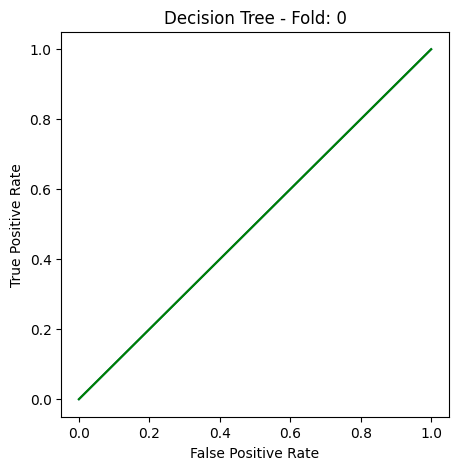

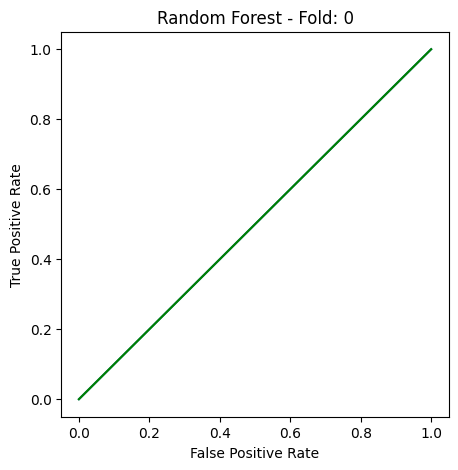

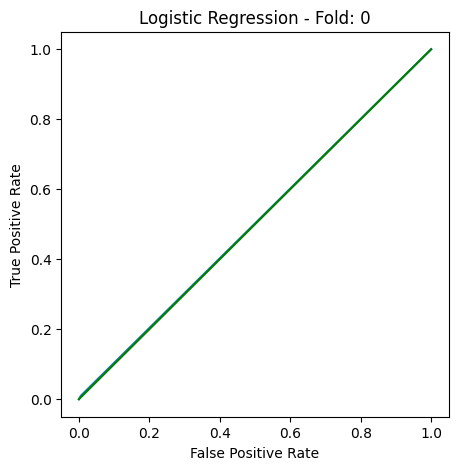

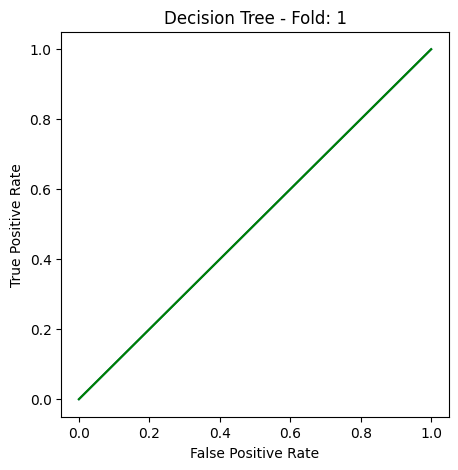

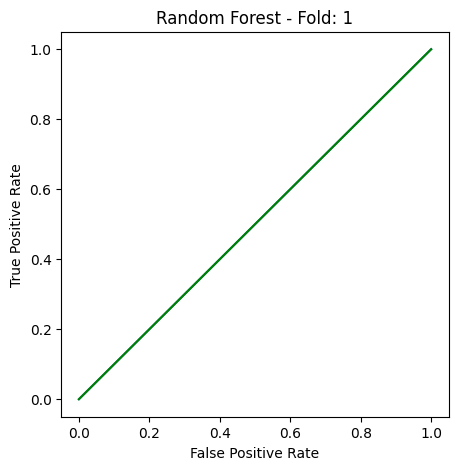

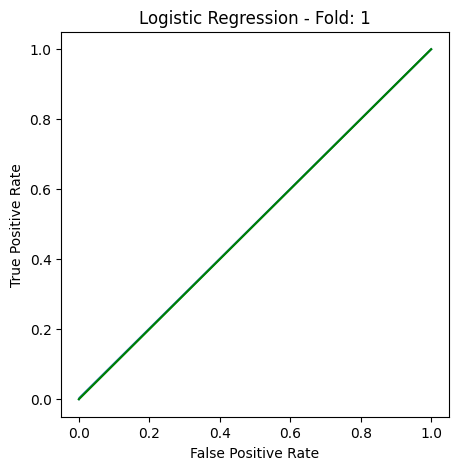

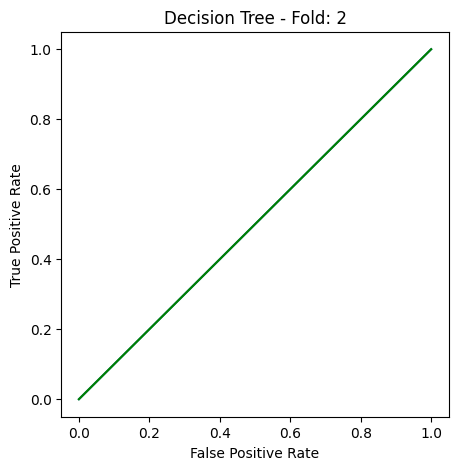

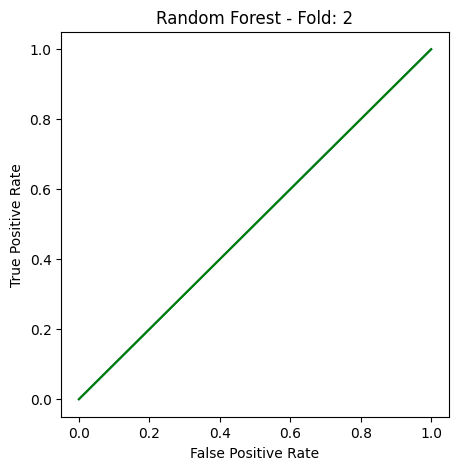

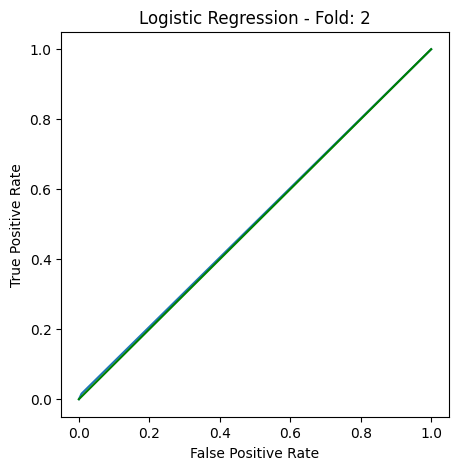

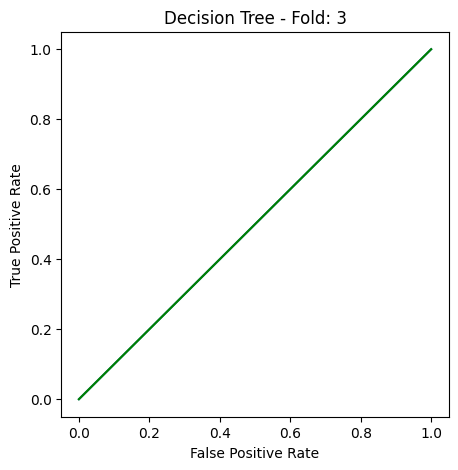

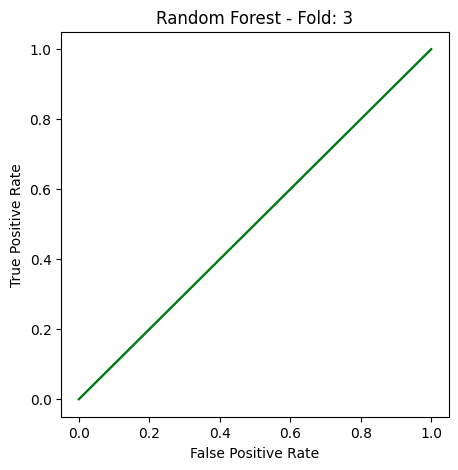

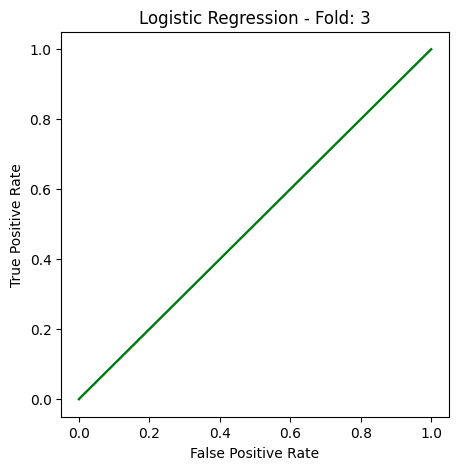

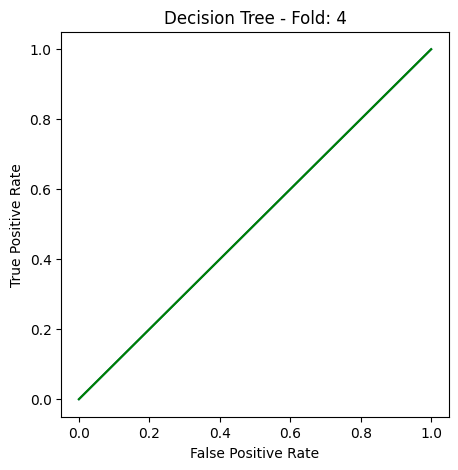

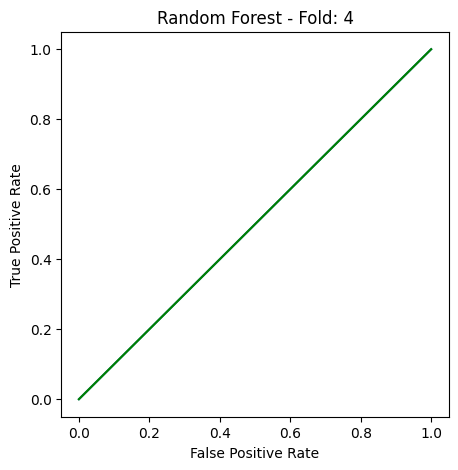

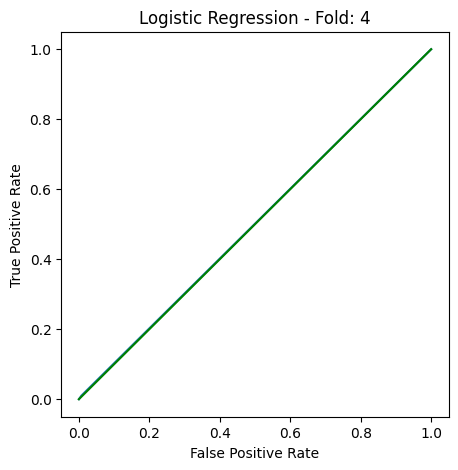

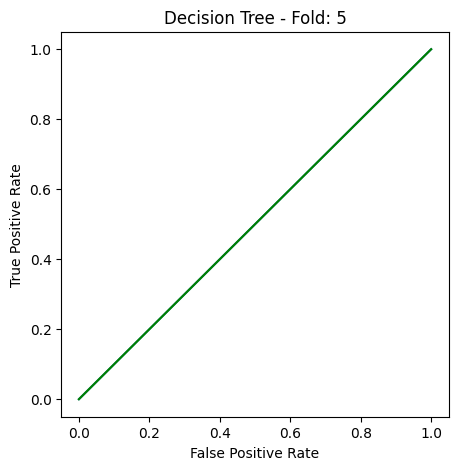

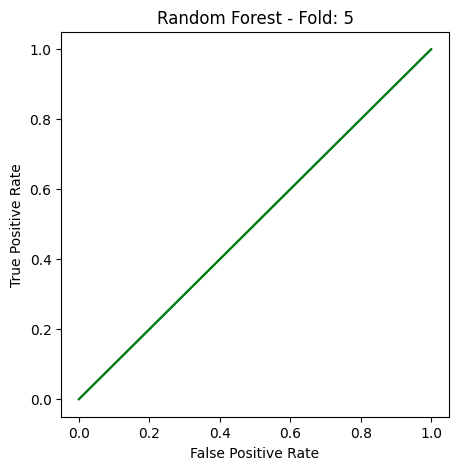

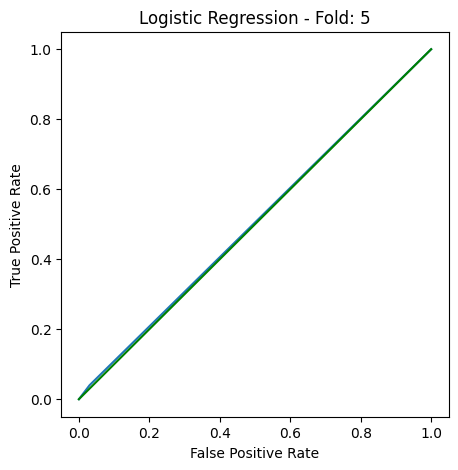

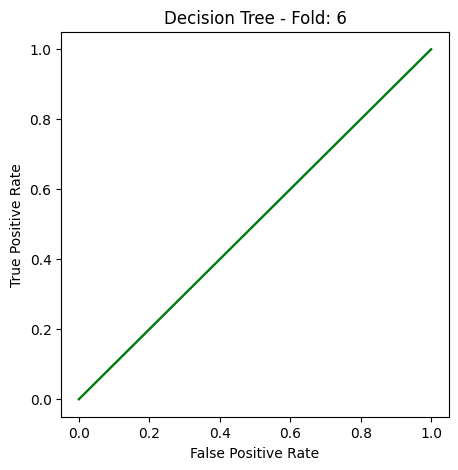

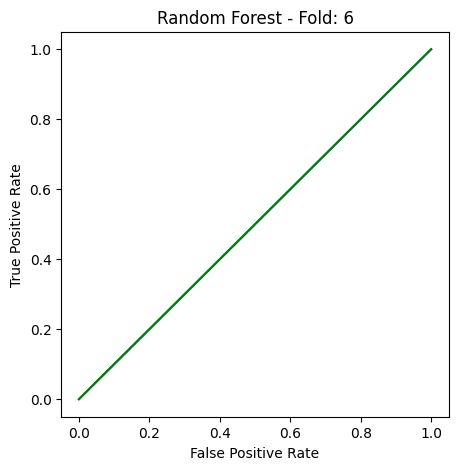

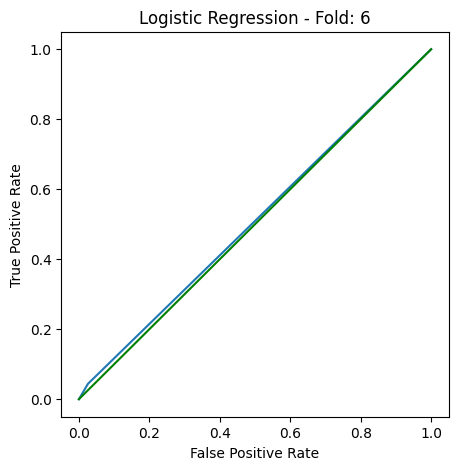

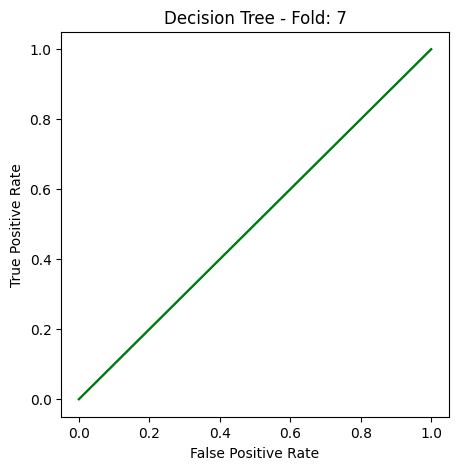

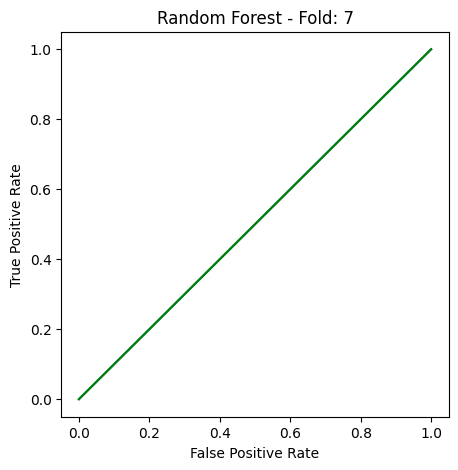

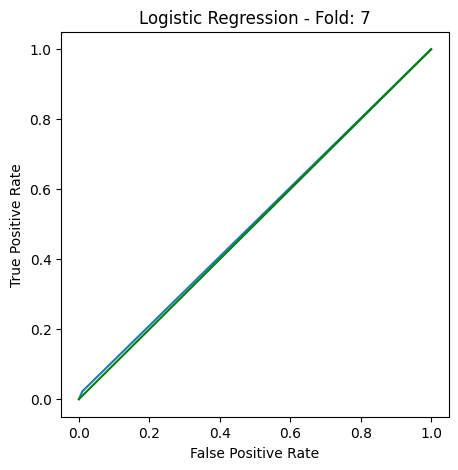

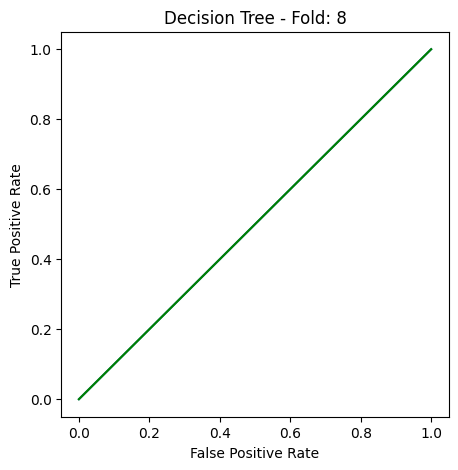

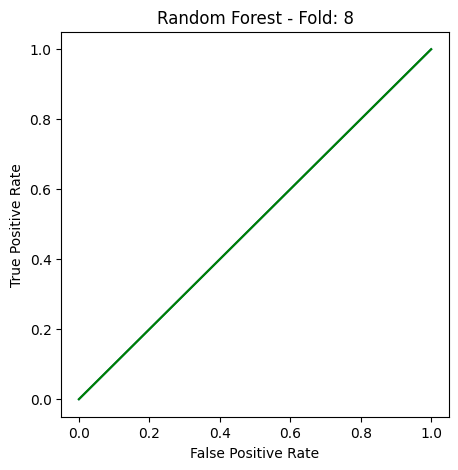

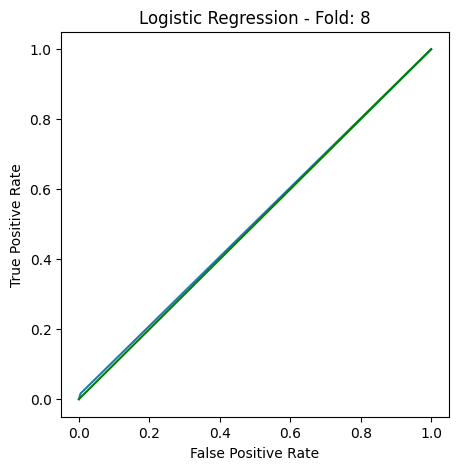

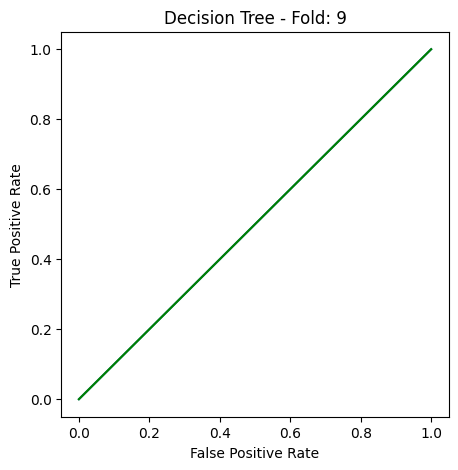

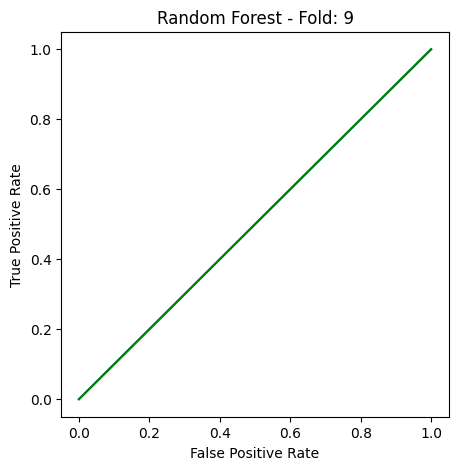

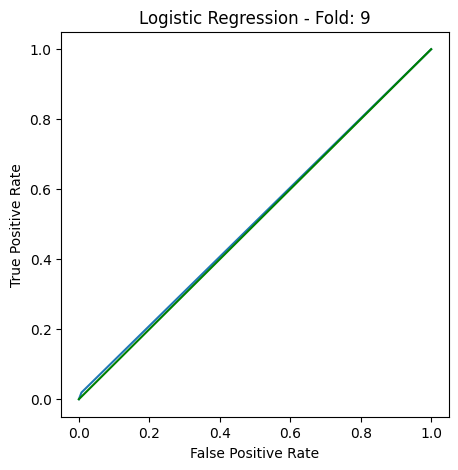

In [123]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, auc, roc_curve, RocCurveDisplay
from sklearn.model_selection import KFold
import pandas as pnd

# initialize all models with necessary hyperparams
decision_tree = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=2)
random_forest = RandomForestClassifier(n_estimators=800, max_depth=5, min_samples_leaf=2, min_samples_split=2, random_state=1)
logistic_regressor = LogisticRegression(max_iter=100, C=10, penalty='l2')

#generate k=10 splits of the data
kf = KFold(n_splits=10)
kf.get_n_splits(X)


def plot_roc_curve(fpr, tpr, model, fold):
  roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
  roc_display.figure_.set_size_inches(5,5)
  plt.plot([0, 1], [0, 1], color = 'g')
  plt.title(model + " - Fold: " + str(fold))

#create dataframe to store all results
hyper_results = pnd.DataFrame(columns=['fold', 'model', 'accuracy', 'f1_score', 'recall', 'precision', 'auc','tpr', 'fpr'])
r = 0

for i, (train_index,test_index) in enumerate(kf.split(X)):
    print("\n\n Fold: ", i)
    print("Train Index: ", train_index,)
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

    print("\nDecision Tree")
    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    prec = precision_score(y_test, y_pred, zero_division=1)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_score=auc(fpr, tpr)
    plot_roc_curve(fpr,tpr, "Decision Tree", i)
    print('Accuracy Score: ', acc)
    print('F1 Score: ', f1)
    print('Recall Score: ', recall)
    print('Precision Score: ', prec)
    print('AUC: ', auc_score)
    hyper_results.loc[r] = [i, 'DT', acc, f1, recall, prec, auc_score, tpr, fpr]
    r=r+1


    print("\nRandom Forest")
    random_forest.fit(X_train, y_train)
    y_pred_rf = random_forest.predict(X_test)
    acc = accuracy_score(y_test, y_pred_rf)
    f1 = f1_score(y_test, y_pred_rf, zero_division=1)
    recall = recall_score(y_test, y_pred_rf, zero_division=1)
    prec = precision_score(y_test, y_pred_rf, zero_division=1)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
    auc_score=auc(fpr, tpr)
    plot_roc_curve(fpr,tpr, "Random Forest", i)
    print('Accuracy Score: ', acc)
    print('F1 Score: ', f1)
    print('Recall Score: ', recall)
    print('Precision Score: ', prec)
    print('AUC: ', auc_score)
    hyper_results.loc[r] = [i, 'RF', acc, f1, recall, prec, auc_score, tpr, fpr]
    r=r+1

    print("\nLogistic Regression")
    logistic_regressor.fit(X_train,y_train)
    y_pred_lr = logistic_regressor.predict(X_test)
    acc = accuracy_score(y_test, y_pred_lr)
    f1 = f1_score(y_test, y_pred_lr, zero_division=1)
    recall = recall_score(y_test, y_pred_lr, zero_division=1)
    prec = precision_score(y_test, y_pred_lr, zero_division=1)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
    auc_score=auc(fpr, tpr)
    plot_roc_curve(fpr,tpr, "Logistic Regression", i)
    print('Accuracy Score: ', acc)
    print('F1 Score: ', f1)
    print('Recall Score: ', recall)
    print('Precision Score: ', prec)
    print('AUC: ', auc_score)
    hyper_results.loc[r] = [i, 'LR', acc, f1, recall, prec, auc_score, tpr, fpr]
    r=r+1

In [124]:
dth_data = hyper_results.loc[results.model == "DT"]
lrh_data = hyper_results.loc[results.model == "LR"]
rfh_data = hyper_results.loc[results.model == "RF"]

In [125]:
dth_data.head(10)

,fold,model,accuracy,f1_score,recall,precision,auc,tpr,fpr
0,0,DT,0.797702,0.0,0.0,1.0,0.5,"[0.0, 1.0]","[0.0, 1.0]"
3,1,DT,0.803492,0.0,0.0,1.0,0.5,"[0.0, 1.0]","[0.0, 1.0]"
6,2,DT,0.776692,0.0,0.0,1.0,0.5,"[0.0, 1.0]","[0.0, 1.0]"
9,3,DT,0.794245,0.0,0.0,1.0,0.5,"[0.0, 1.0]","[0.0, 1.0]"
12,4,DT,0.773706,0.0,0.0,1.0,0.5,"[0.0, 1.0]","[0.0, 1.0]"
15,5,DT,0.782573,0.0,0.0,1.0,0.5,"[0.0, 1.0]","[0.0, 1.0]"
18,6,DT,0.823199,0.0,0.0,1.0,0.5,"[0.0, 1.0]","[0.0, 1.0]"
21,7,DT,0.808089,0.0,0.0,1.0,0.5,"[0.0, 1.0]","[0.0, 1.0]"
24,8,DT,0.825009,0.0,0.0,1.0,0.5,"[0.0, 1.0]","[0.0, 1.0]"
27,9,DT,0.796326,0.0,0.0,1.0,0.5,"[0.0, 1.0]","[0.0, 1.0]"


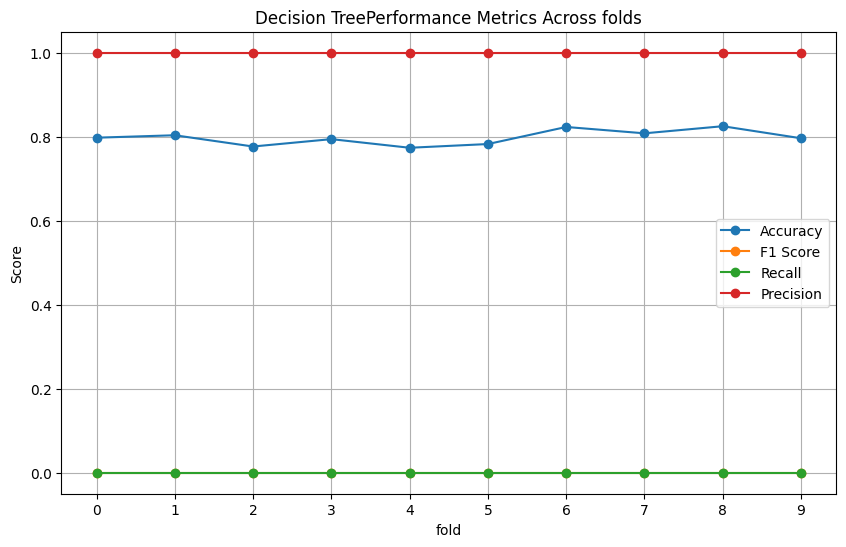

In [126]:
plot_metrics(dth_data, 'Decision Tree')

In [127]:
rfh_data.head(10)

,fold,model,accuracy,f1_score,recall,precision,auc,tpr,fpr
1,0,RF,0.797702,0.0,0.0,1.0,0.5,"[0.0, 1.0]","[0.0, 1.0]"
4,1,RF,0.803492,0.0,0.0,1.0,0.5,"[0.0, 1.0]","[0.0, 1.0]"
7,2,RF,0.776692,0.0,0.0,1.0,0.5,"[0.0, 1.0]","[0.0, 1.0]"
10,3,RF,0.794245,0.0,0.0,1.0,0.5,"[0.0, 1.0]","[0.0, 1.0]"
13,4,RF,0.773706,0.0,0.0,1.0,0.5,"[0.0, 1.0]","[0.0, 1.0]"
16,5,RF,0.782573,0.0,0.0,1.0,0.5,"[0.0, 1.0]","[0.0, 1.0]"
19,6,RF,0.823199,0.0,0.0,1.0,0.5,"[0.0, 1.0]","[0.0, 1.0]"
22,7,RF,0.808089,0.0,0.0,1.0,0.5,"[0.0, 1.0]","[0.0, 1.0]"
25,8,RF,0.825009,0.0,0.0,1.0,0.5,"[0.0, 1.0]","[0.0, 1.0]"
28,9,RF,0.796326,0.0,0.0,1.0,0.5,"[0.0, 1.0]","[0.0, 1.0]"


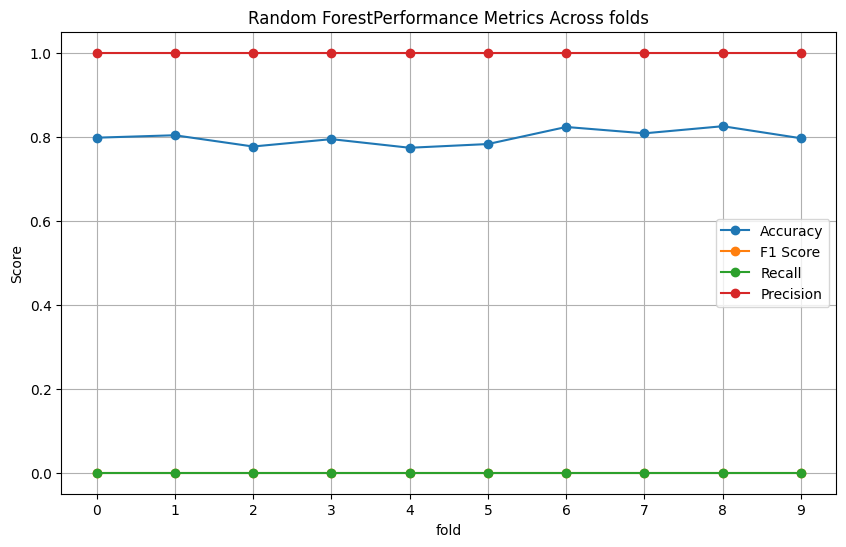

In [128]:
plot_metrics(rfh_data, 'Random Forest')

In [129]:
lrh_data.head(10)

,fold,model,accuracy,f1_score,recall,precision,auc,tpr,fpr
2,0,LR,0.795078,0.019905,0.010286,0.306667,0.502194,"[0.0, 0.010286225402504472, 1.0]","[0.0, 0.005897697629579222, 1.0]"
5,1,LR,0.803040,0.007296,0.003683,0.380952,0.501110,"[0.0, 0.003683241252302026, 1.0]","[0.0, 0.0014637991217205269, 1.0]"
8,2,LR,0.774430,0.030338,0.015802,0.378641,0.504173,"[0.0, 0.015802269043760128, 1.0]","[0.0, 0.007455731593662628, 1.0]"
11,3,LR,0.794245,0.001756,0.000880,0.500000,0.500326,"[0.0, 0.0008795074758135445, 1.0]","[0.0, 0.000227842333105491, 1.0]"
14,4,LR,0.770630,0.019342,0.009996,0.297619,0.501548,"[0.0, 0.009996001599360257, 1.0]","[0.0, 0.006899777803765641, 1.0]"
17,5,LR,0.767553,0.069540,0.039950,0.268156,0.504829,"[0.0, 0.039950062421972535, 1.0]","[0.0, 0.03029251936640074, 1.0]"
20,6,LR,0.809808,0.075638,0.044012,0.268750,0.509146,"[0.0, 0.044012282497441144, 1.0]","[0.0, 0.025719938448010553, 1.0]"
23,7,LR,0.804651,0.041722,0.022159,0.356061,0.506321,"[0.0, 0.02215935879302216, 1.0]","[0.0, 0.009517411264136156, 1.0]"
26,8,LR,0.824104,0.030907,0.016029,0.430556,0.505766,"[0.0, 0.016028955532574975, 1.0]","[0.0, 0.004496600131607809, 1.0]"
29,9,LR,0.794426,0.036472,0.019103,0.401869,0.505915,"[0.0, 0.019102621057307864, 1.0]","[0.0, 0.00727190092034996, 1.0]"


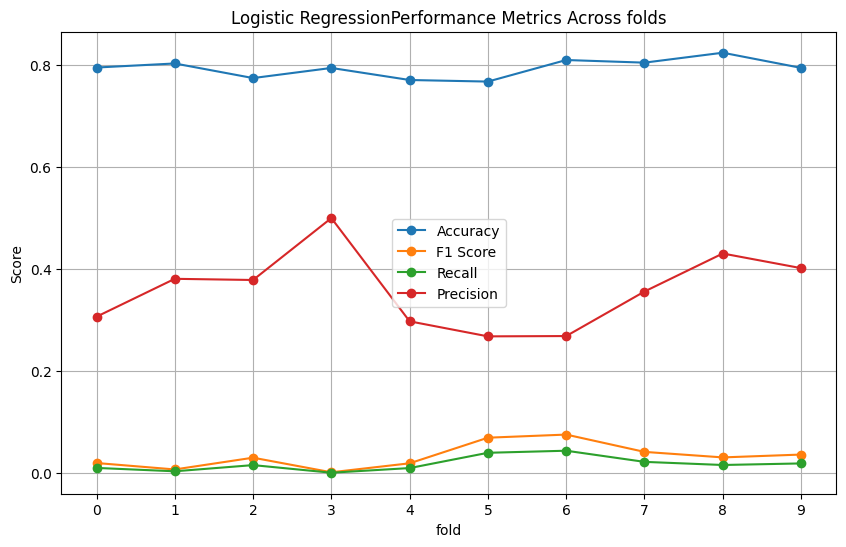

In [130]:
plot_metrics(lrh_data, 'Logistic Regression')

## **Results analysis after hyperparameter tuning**


The analysis of the three models, based on the obtained results, reveals a rather unique scenario. The Decision Tree and Random Forest models have generated some peculiar performance indicators: they have achieved a perfect accuracy score and precision of 1.0, while F1 score and recall are 0.0. This raises concerns about these models, as perfect accuracy is often a strong indication of overfitting, where the models memorize the training data but fail to generalize to unseen data.

In contrast, the Logistic Regression model presents more plausible results. While accuracy remains relatively stable across folds, the F1 score, recall, and precision metrics show variations, suggesting a model that may be better at generalization. The area under the curve (AUC) also varies, which is a positive indication of how well the model can distinguish between classes.

In summary, after hyperparameter tuning using GridSeachCV the Logistic Regression model provides more interpretable and seemingly reliable results compared to the Decision Tree and Random Forest models, which exhibit overfitting.

## **Limitations**

As evidenced by just above average accuaracy and low F1 and Recall Scores, the models used for classification are very well suited to the task. This is due to a couple of reasons:

1. **Incomplete Data**: Although, the quality of data provided is good in terms of non-null values, no duplicates and overall less no. of errors and outliers, but the information available seems incomplete. e.g. Having a reason for no-show would be very helpful in predicting future no-shows, also having the either the clinics location or it's relative distance to each neighbourhood could shine a light if people in farther neighbourhoods are more likely to have no-shows. Finally, having the information if the clinic specializes in treating certain conditions, it could give more context on if people with the given conditions might miss their appointments.

2. **Class Imbalance**: In the performance evaluation results, the F1 score and recall for some models are quite low. This suggests that the dataset may suffer from class imbalance, meaning that one class (likely the positive class) is underrepresented. Imbalanced data can lead to models that perform poorly on the minority class.

3. **Data Separability**: Based on the performance of the models used, which rely on data being lineraly separable, it is clear that the data is clustered around the center with a mix of both outcomes.

4. **Model Selection**: The choice of models might not be optimal. If the data is not linearly separable or hard to classify, using models like SVM or clustering might yield better results.



<br><br>

**Q3: Suppose the distribution of length of stay of patients in a hospital is given by the graph below. You are given the task to predict the length of stay. How would you change the problem from a regression problem to a binary classification problem?**

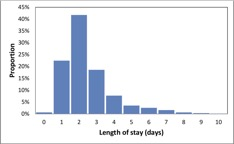

The provided graph represents the distribution of length of stay in days ranging from 0 to 10 on the x-axis. While the y-axis represents the proprotion of patients, for the given length of stay. The length of stay piques in terms of proportion of patients at 2 days, before gradually declining.

To convert this from a regression to a binary classification problem, we can divide the length of stay in 2 categories: **short stay** and **long stay**. In order to do this, we can decide on a threshold value which act as a reference value to classify a stay as short or long. The threshold can be selected as either the mean or median of the data, or based on some medical or other considerations that can be obntained from deeper analysis of the data.

Once the threshold is decided, appropriate labels can be added to the data to split the data into the two groups.

Finally, we can use any of the models available at our disposal to predict whether a patient will have a short or long stay such as decision tree, random forest or logistic regression, especially if the decision boundary is clearly defined. If the data is not spearable linearly, in that case methods like clustering and SVM can also be used.